In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats as ss
import os

data_dir = ""
for dirname, _, filenames in os.walk('../../data/'):
    data_dir = dirname
    for filename in filenames:
        print(os.path.join(dirname, filename))
        

../../data/tcdml1920-rec-click-pred--submission file (example).csv
../../data/tcdml1920-rec-click-pred--submission file.csv
../../data/tcdml1920-rec-click-pred--test.csv
../../data/tcdml1920-rec-click-pred--training.csv


In [40]:
raw_train_df = pd.read_csv(data_dir+"/tcdml1920-rec-click-pred--training.csv")
raw_train_df.describe()

C:\ProgramData\Anaconda3\envs\kaggle\lib\site-packages\IPython\core\interactiveshell.py:3058: DtypeWarning: Columns (4,5,34) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,recommendation_set_id,organization_id,hour_request_received,rec_processing_time,number_of_recs_in_set,clicks,ctr,set_clicked
count,385687.000000,385687.000000,385687.000000,385687.000000,385687.000000,385687.000000,385687.000000,385687.000000
mean,255927.413200,2.055848,12.796205,4.139454,5.832043,0.025285,0.004334,0.017535
std,119099.697905,1.777107,6.205718,61.643860,1.779673,0.233605,0.040158,0.131254
min,46897.000000,1.000000,0.000000,0.005667,1.000000,0.000000,0.000000,0.000000
25%,155516.500000,1.000000,9.000000,0.274834,3.000000,0.000000,0.000000,0.000000
50%,259046.000000,1.000000,13.000000,2.561020,7.000000,0.000000,0.000000,0.000000
75%,357939.500000,4.000000,18.000000,5.691500,7.000000,0.000000,0.000000,0.000000
max,459536.000000,8.000000,23.000000,17064.400000,7.000000,19.000000,2.714300,1.000000


(array([378924.,      0.,      0.,      0.,      0.,      0.,      0.,
             0.,      0.,   6763.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

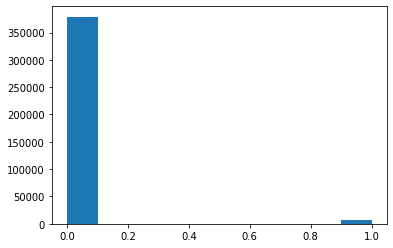

In [9]:
plt.hist(raw_train_df['algorithm_class'])

In [13]:
raw_train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 385687 entries, 0 to 385686
Data columns (total 46 columns):
recommendation_set_id               385687 non-null int64
user_id                             385687 non-null object
session_id                          385687 non-null object
query_identifier                    385687 non-null object
query_word_count                    385687 non-null object
query_char_count                    385687 non-null object
query_detected_language             385687 non-null object
query_document_id                   385687 non-null object
document_language_provided          385687 non-null object
year_published                      385687 non-null object
number_of_authors                   385687 non-null object
abstract_word_count                 385687 non-null object
abstract_char_count                 385687 non-null object
abstract_detected_language          385609 non-null object
first_author_id                     385687 non-null object
num_p

In [72]:
total = raw_train_df.isnull().sum().sort_values(ascending=False)
percent = (raw_train_df.isnull().sum()/raw_train_df.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data

,Total,Percent
app_lang,80,0.000207
abstract_detected_language,78,0.000202
country_by_ip,10,0.000026
app_version,2,0.000005
set_clicked,0,0.000000
hour_request_received,0,0.000000
item_type,0,0.000000
application_type,0,0.000000
organization_id,0,0.000000
num_pubs_by_first_author,0,0.000000


In [67]:
for col in raw_train_df.columns:
    if '\\N' in raw_train_df[col].value_counts().index:
        print(col ,': ' , raw_train_df[col].value_counts().loc['\\N'], ' ,', int(raw_train_df[col].value_counts().loc['\\N']*100/385687))

user_id :  333849  , 86
session_id :  333849  , 86
query_identifier :  154  , 0
query_word_count :  154  , 0
query_char_count :  154  , 0
query_detected_language :  3597  , 0
query_document_id :  220470  , 57
document_language_provided :  381260  , 98
year_published :  315710  , 81
number_of_authors :  316412  , 82
abstract_word_count :  238869  , 61
abstract_char_count :  238869  , 61
abstract_detected_language :  238869  , 61
first_author_id :  319231  , 82
num_pubs_by_first_author :  319231  , 82
item_type :  36223  , 9
app_version :  115523  , 29
app_lang :  16617  , 4
user_os :  384369  , 99
user_os_version :  385674  , 99
user_java_version :  385680  , 99
user_timezone :  384363  , 99
country_by_ip :  1574  , 0
timezone_by_ip :  76209  , 19
local_time_of_request :  85059  , 22
local_hour_of_request :  85059  , 22
recommendation_algorithm_id_used :  10677  , 2
cbf_parser :  110616  , 28
time_recs_recieved :  330975  , 85
time_recs_displayed :  331317  , 85
time_recs_viewed :  3725

In [41]:
for app in set(raw_train_df['algorithm_class']):
    temp_df = raw_train_df[raw_train_df['algorithm_class']==app]
    print('\nAlgorithm: ', app)
    for col in raw_train_df.columns:        
        if '\\N' in temp_df[col].value_counts().index:
            print(col ,': ' , temp_df[col].value_counts().loc['\\N'], ' ,', int(temp_df[col].value_counts().loc['\\N']*100/len(temp_df)), '%')


Algorithm:  unknown
user_id :  11591  , 88 %
session_id :  11591  , 88 %
query_detected_language :  201  , 1 %
query_document_id :  9906  , 76 %
document_language_provided :  12984  , 99 %
year_published :  12292  , 94 %
number_of_authors :  12298  , 94 %
abstract_word_count :  10125  , 77 %
abstract_char_count :  10125  , 77 %
abstract_detected_language :  10125  , 77 %
first_author_id :  12330  , 94 %
num_pubs_by_first_author :  12330  , 94 %
item_type :  353  , 2 %
app_version :  2334  , 17 %
app_lang :  855  , 6 %
user_os :  12999  , 99 %
user_os_version :  13026  , 100 %
user_java_version :  13026  , 100 %
user_timezone :  12999  , 99 %
country_by_ip :  73  , 0 %
timezone_by_ip :  787  , 6 %
local_time_of_request :  808  , 6 %
local_hour_of_request :  808  , 6 %
recommendation_algorithm_id_used :  10677  , 81 %
cbf_parser :  13026  , 100 %
time_recs_recieved :  10755  , 82 %
time_recs_displayed :  10762  , 82 %
time_recs_viewed :  12327  , 94 %

Algorithm:  sentence_embeddings
us

In [66]:
for app in set(raw_train_df['application_type']):
    temp_df = raw_train_df[raw_train_df['application_type']==app]
    print('\nApplication: ', app)
    for col in raw_train_df.columns:        
        if '\\N' in temp_df[col].value_counts().index:
            print(col ,': ' , temp_df[col].value_counts().loc['\\N'], ' ,', int(temp_df[col].value_counts().loc['\\N']*100/len(temp_df)), '%')


Application:  0
user_id :  260  , 100 %
session_id :  260  , 100 %
query_identifier :  154  , 59 %
query_word_count :  154  , 59 %
query_char_count :  154  , 59 %
query_detected_language :  154  , 59 %
query_document_id :  224  , 86 %
document_language_provided :  260  , 100 %
year_published :  229  , 88 %
number_of_authors :  246  , 94 %
abstract_word_count :  230  , 88 %
abstract_char_count :  230  , 88 %
abstract_detected_language :  230  , 88 %
first_author_id :  246  , 94 %
num_pubs_by_first_author :  246  , 94 %
item_type :  255  , 98 %
app_version :  241  , 92 %
app_lang :  254  , 97 %
user_os :  260  , 100 %
user_os_version :  247  , 95 %
user_java_version :  253  , 97 %
user_timezone :  254  , 97 %
country_by_ip :  92  , 35 %
timezone_by_ip :  246  , 94 %
local_time_of_request :  246  , 94 %
local_hour_of_request :  246  , 94 %
cbf_parser :  79  , 30 %
time_recs_recieved :  244  , 93 %
time_recs_displayed :  244  , 93 %
time_recs_viewed :  253  , 97 %

Application:  digital_l

In [149]:
for col in raw_train_df.columns:
    if '\\N' in raw_train_df[col].value_counts().index:
        print(col ,': ' , raw_train_df[col].value_counts().loc['\\N'])

user_id :  333849
session_id :  333849
query_identifier :  154
query_word_count :  154
query_char_count :  154
query_detected_language :  3597
query_document_id :  220470
document_language_provided :  381260
year_published :  315710
number_of_authors :  316412
abstract_word_count :  238869
abstract_char_count :  238869
abstract_detected_language :  238869
first_author_id :  319231
num_pubs_by_first_author :  319231
item_type :  36223
app_version :  115523
app_lang :  16617
user_os :  384369
user_os_version :  385674
user_java_version :  385680
user_timezone :  384363
country_by_ip :  1574
timezone_by_ip :  76209
local_time_of_request :  85059
local_hour_of_request :  85059
cbf_parser :  110616
time_recs_recieved :  330975
time_recs_displayed :  331317
time_recs_viewed :  372540


In [107]:
raw_train_df[raw_train_df['application_type']=='e-commerce']['cbf_parser'].value_counts()

edismax_QP     34273
\N             29332
standard_QP    23397
mlt_QP         13068
Name: cbf_parser, dtype: int64

In [164]:
raw_train_df['algorithm_class'].value_counts()

content_based_filtering    275071
sentence_embeddings         81931
unknown                     13026
stereotype                  10735
same_author                  4600
random                        324
Name: algorithm_class, dtype: int64

In [46]:
raw_train_df[raw_train_df['recommendation_algorithm_id_used'] =='\\N']

,recommendation_set_id,user_id,session_id,query_identifier,query_word_count,query_char_count,query_detected_language,query_document_id,document_language_provided,year_published,...,cbf_parser,search_title,search_keywords,search_abstract,time_recs_recieved,time_recs_displayed,time_recs_viewed,clicks,ctr,set_clicked
603,47524,\N,\N,Withheld for privacy,5,42,en,\N,\N,\N,...,\N,no,no,no,\N,\N,\N,0,0.0000,0
1279,48214,\N,\N,Withheld for privacy,2,14,sw,\N,\N,\N,...,\N,no,no,no,\N,\N,\N,0,0.0000,0
3829,50842,\N,\N,Withheld for privacy,5,25,en,80296321,\N,2005,...,\N,no,no,no,\N,\N,\N,0,0.0000,0
4168,51188,\N,\N,Withheld for privacy,7,56,en,13644745,\N,2010,...,\N,no,no,no,\N,\N,\N,0,0.0000,0
4469,51501,\N,\N,Withheld for privacy,11,73,en,\N,\N,\N,...,\N,no,no,no,\N,\N,\N,0,0.0000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55000,104529,\N,\N,Withheld for privacy,15,94,en,36153704,\N,2014,...,\N,no,no,no,\N,\N,\N,0,0.0000,0
55008,104550,\N,\N,Withheld for privacy,10,57,en,\N,\N,\N,...,\N,no,no,no,\N,\N,\N,0,0.0000,0
55009,104551,\N,\N,Withheld for privacy,12,103,en,\N,\N,\N,...,\N,no,no,no,\N,\N,\N,1,0.1429,1
99853,160352,\N,\N,Withheld for privacy,33,220,en,\N,\N,\N,...,\N,no,no,no,\N,\N,\N,0,0.0000,0


In [152]:
raw_train_df[raw_train_df['algorithm_class']=='unknown']['time_recs_viewed'].value_counts()

\N                  12327
15/09/2019 18:14        2
19/09/2019 15:26        2
29/09/2019 13:59        2
06/10/2019 17:12        2
                    ...  
01/10/2019 14:56        1
24/09/2019 16:01        1
18/09/2019 15:52        1
06/10/2019 02:01        1
25/09/2019 00:52        1
Name: time_recs_viewed, Length: 689, dtype: int64

In [158]:
raw_train_df[raw_train_df['time_recs_viewed']!='\\N']['application_type'].value_counts()

e-commerce         8728
blog               4341
digital_library      71
0                     7
Name: application_type, dtype: int64

In [59]:
raw_train_df[['algorithm_class', 'application_type', 'set_clicked']].groupby(['application_type', 'algorithm_class']).count().reset_index()

,application_type,algorithm_class,set_clicked
0,0,content_based_filtering,181
1,0,same_author,2
2,0,sentence_embeddings,70
3,0,stereotype,7
4,blog,content_based_filtering,10709
5,blog,sentence_embeddings,3651
6,blog,stereotype,3
7,blog,unknown,849
8,digital_library,content_based_filtering,193443
9,digital_library,random,324


In [135]:
raw_train_df[['algorithm_class', 'recommendation_algorithm_id_used', 'set_clicked']].groupby(['algorithm_class', 'recommendation_algorithm_id_used']).count().reset_index()

,algorithm_class,recommendation_algorithm_id_used,set_clicked
0,content_based_filtering,1,37953
1,content_based_filtering,2,68514
2,content_based_filtering,6,5979
3,content_based_filtering,7,20877
4,content_based_filtering,8,23396
5,content_based_filtering,9,6288
6,content_based_filtering,10,9080
7,content_based_filtering,11,32019
8,content_based_filtering,12,20399
9,content_based_filtering,13,23595


In [85]:
raw_train_df['clicks'].value_counts()

0     378924
1       5049
2       1065
3        367
4        138
5         57
6         39
7         28
10         5
9          5
8          5
11         3
19         1
18         1
Name: clicks, dtype: int64

In [87]:
raw_train_df[raw_train_df['set_clicked']==1]['number_of_recs_in_set'].value_counts()

7    5388
3    1068
5     207
6      41
2      23
4      20
1      16
Name: number_of_recs_in_set, dtype: int64

In [139]:
raw_train_df['application_type'].value_counts()

digital_library    270145
e-commerce         100070
blog                15212
0                     260
Name: application_type, dtype: int64

In [72]:
raw_train_df['recommendation_algorithm_id_used'] = raw_train_df['recommendation_algorithm_id_used'].replace('\\N', -1).astype('int64')

In [102]:
for app in ['e-commerce', 'blog']:
    print('App: ', app, ', Categories: ', len(raw_train_df[raw_train_df['application_type']==app]['query_identifier'].value_counts()))

App:  e-commerce , Categories:  30353
App:  blog , Categories:  324


In [104]:
for app in set(raw_train_df['application_type']):
    print('App: ', app, ', Categories: ', len(raw_train_df[raw_train_df['application_type']==app]['query_document_id'].value_counts()))

App:  e-commerce , Categories:  8295
App:  blog , Categories:  190
App:  digital_library , Categories:  55295
App:  0 , Categories:  8


In [122]:
raw_train_df[raw_train_df['application_type']=='blog']['query_document_id'].value_counts()

124015831    2004
124015835    1589
124015816    1490
124015830     714
124015836     562
             ... 
124017228       1
124016840       1
124017315       1
124017175       1
124016115       1
Name: query_document_id, Length: 190, dtype: int64

In [129]:
set(raw_train_df[(raw_train_df['application_type']=='blog') & (raw_train_df['query_document_id']=='124015816')]['query_identifier'])

{'Google File Stream: A Horror Story with Corrupted Files and More | Prof. Joeran Beel (TCD Dublin)',
 'Google File Stream: A Horror Story with Corrupted Files and More | | Prof. Joeran Beel (TCD Dublin)'}

In [163]:
raw_train_df[(raw_train_df['search_title']=='yes') & (raw_train_df['query_document_id']!='\\N')]['application_type'].value_counts()

digital_library    52698
e-commerce         51880
blog               10522
0                     27
Name: application_type, dtype: int64

(0, 70)

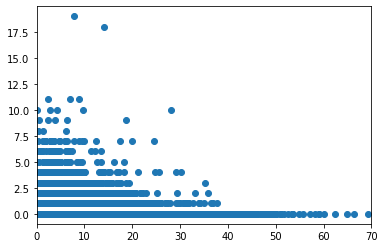

In [17]:
plt.scatter(raw_train_df['rec_processing_time'], raw_train_df['clicks'])
plt.xlim(0, 70)

In [37]:
raw_train_df[['clicks', 'rec_processing_time']].groupby(['clicks']).describe(percentiles=[0.75, 0.85, 0.9, 0.98])

rec_processing_time                                              \
                     count       mean        std        min        50%   
clicks                                                                   
0                 378924.0   4.140583  62.188447   0.005667   2.552615   
1                   5049.0   3.858176   4.557650   0.024029   2.717900   
2                   1065.0   4.555476   4.708866   0.020208   3.240810   
3                    367.0   4.911586   4.650229   0.027848   3.779340   
4                    138.0   5.395766   5.858663   0.030134   3.790685   
5                     57.0   4.324178   3.927623   0.051409   3.526710   
6                     39.0   3.701062   3.477453   0.046102   3.182890   
7                     28.0   6.175078   6.010419   0.125951   3.672480   
8                      5.0   1.638785   2.585752   0.089858   0.379143   
9                      5.0   6.343232   7.202550   0.481579   3.814960   
10                     5.0   8.970337  11.232606   0.106024   4.200700   
11                     3.0   6.084347   3.261755   2.490920   6.904070   
18                     1.0  14.198600        NaN  14.198600  14.198600   
19                     1.0   7.807350        NaN   7.807350   7.807350   

                                                                 
              75%        85%        90%        98%          max  
clicks                                                           
0        5.689715   7.880387   9.762129  17.900918  17064.40000  
1        5.447860   7.478338   9.386980  17.467856     37.81080  
2        6.492890   9.165854  10.884280  17.959524     35.83100  
3        7.627635   9.413569  11.150200  15.827352     35.26990  
4        6.992957   9.544265  13.319900  24.908470     30.18700  
5        5.913970   7.001100   8.748130  15.768108     18.18050  
6        6.187695   6.639523   6.864668  12.532068     13.46170  
7        8.152518   9.985416  13.988580  22.007120     24.54080  
8        1.260120   3.233464   4.220136   5.798811      6.19348  
9        6.317790  11.252594  13.719996  17.667839     18.65480  
10       9.717290  17.053694  20.721896  26.591019     28.05830  
11       7.881060   8.271856   8.467254   8.779891      8.85805  
18      14.198600  14.198600  14.198600  14.198600     14.19860  
19       7.807350   7.807350   7.807350   7.807350      7.80735

(array([3099., 1204.,  434.,  166.,   68.,   38.,   16.,   10.,    9.,
           5.]),
 array([2.40288000e-02, 3.80270592e+00, 7.58138304e+00, 1.13600602e+01,
        1.51387373e+01, 1.89174144e+01, 2.26960915e+01, 2.64747686e+01,
        3.02534458e+01, 3.40321229e+01, 3.78108000e+01]),
 <a list of 10 Patch objects>)

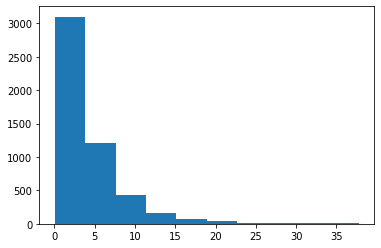

In [29]:
plt.hist(raw_train_df[raw_train_df['clicks']==1]['rec_processing_time'])

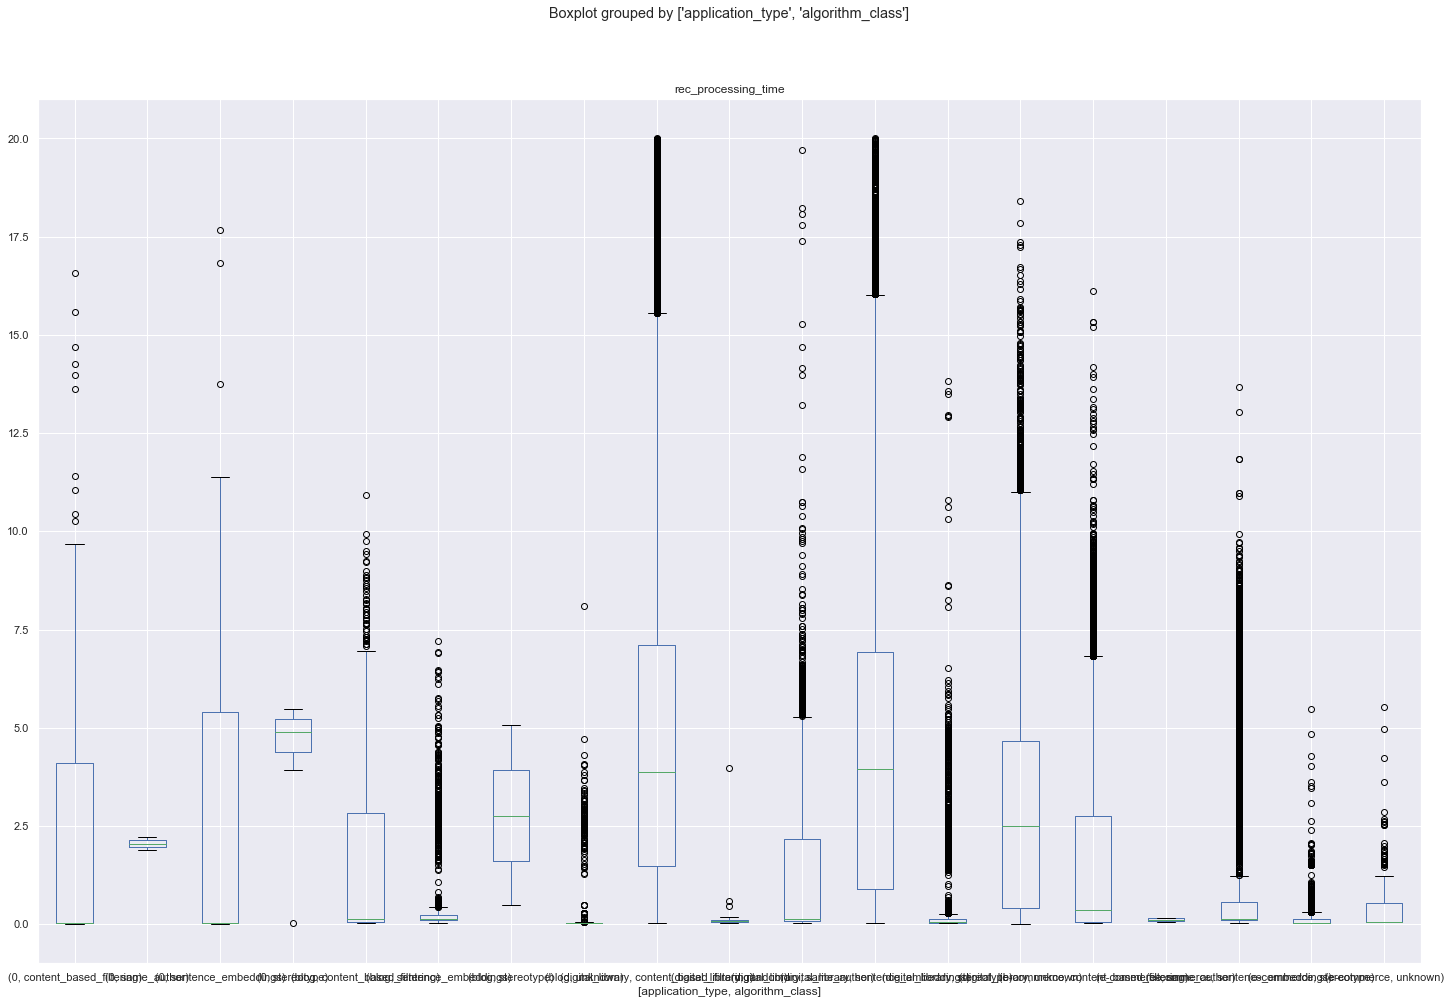

In [171]:
plot = raw_train_df[raw_train_df['rec_processing_time']<20].boxplot(column= ['rec_processing_time'], by=['application_type', 'algorithm_class'], figsize=(24,16))


In [20]:
blog_train = raw_train_df[raw_train_df['application_type']=='blog']
dig_train = raw_train_df[raw_train_df['application_type']=='digital_library']
comm_train = raw_train_df[raw_train_df['application_type']=='e-commerce']

In [94]:
print(blog_train['set_clicked'].value_counts()[1]/ len(blog_train))



0.010452274520115698


In [98]:
dig_train[dig_train['query_document_id']=='\\N']['cli'].value_counts()

0    191525
1      3720
Name: set_clicked, dtype: int64

In [129]:
comm_train[['item_type', 'set_clicked']].groupby(['item_type']).agg({"set_clicked": ['sum', 'count']}).apply(lambda x: x[0]/x[1], axis=1)

item_type
DAB & audio              0.018253
DVD players              0.007082
Everything else          0.013207
Gaming & toys            0.009595
Hard drives & NAS        0.020453
Home entertainment       0.003802
Music making & pedals    0.011601
Networking               0.016811
Photo & frames           0.010917
TVs & monitors           0.020408
\N                       0.007672
dtype: float64

In [135]:
with pd.set_display('rows', )
raw_train_df['user_id'].value_counts()

\N                                  333849
3ce5de6574b74d9e6f6657547091755b      4035
46015d40bb2433595af1410c746e3471      3449
3902677038066845d9c1efc4073ccbad      3153
a0bcf1241d17237ac6d3dea2fea82cc0      2179
                                     ...  
7e5842f7008634461a3e3ce536e57240         3
eec250c1ce93e1977f730c44dd8e5e4d         2
475c938cc71dfebb99d8f9aa7b077a78         2
932dcf4e887ebf44043fe1d53b0e697c         2
246f4b9b0b9f66418324b592f591a927         1
Name: user_id, Length: 200, dtype: int64

(array([11631., 18546., 18157., 10914.,  6431.,  6832.,  6814.,  8157.,
         6401.,  6332.]),
 array([243679. , 265264.6, 286850.2, 308435.8, 330021.4, 351607. ,
        373192.6, 394778.2, 416363.8, 437949.4, 459535. ]),
 <a list of 10 Patch objects>)

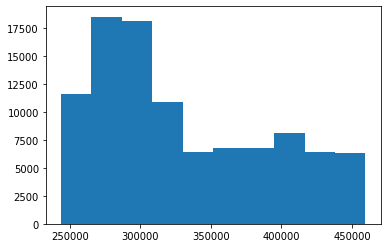

In [155]:
plt.hist(raw_train_df[raw_train_df['organization_id']==4]['recommendation_set_id'])

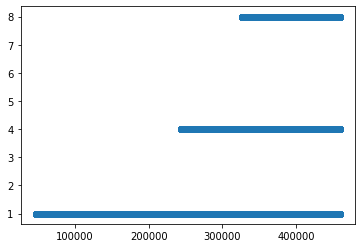

In [152]:
plt.scatter(raw_train_df['recommendation_set_id'], raw_train_df['organization_id'])

In [164]:
raw_train_df['hour_request_received'].value_counts()

15    24599
16    24177
14    23563
11    23198
17    22046
13    21447
10    21401
12    19506
18    18879
9     17551
20    16399
19    16266
21    15772
22    15496
23    13955
8     12760
0     11203
4     10514
3     10340
1     10150
2      9759
5      9280
7      9094
6      8332
Name: hour_request_received, dtype: int64

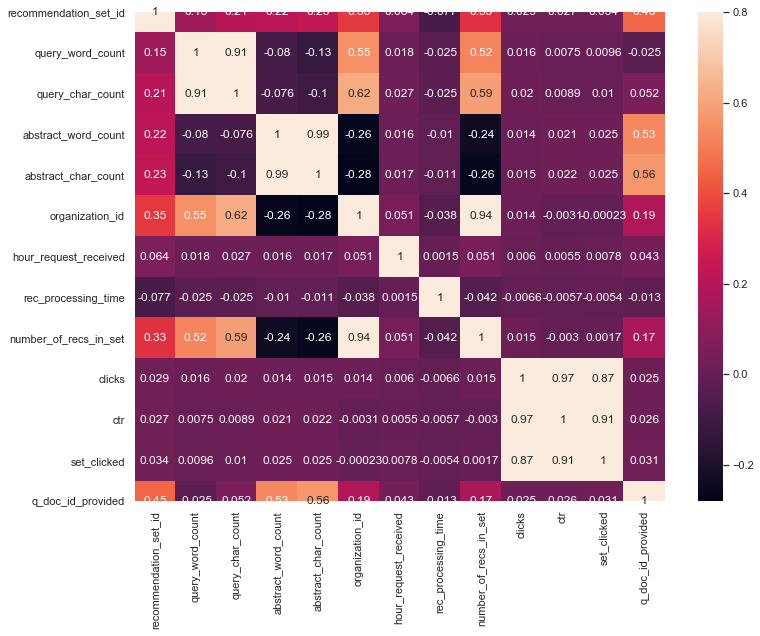

In [252]:
cols = ['query_word_count', 'query_char_count', 'abstract_word_count', 'abstract_char_count', 'q_doc_id_provided']
temp_df = pd.concat([comm_train, blog_train])
# temp_df = dig_train
temp_df[cols] = temp_df[cols].replace("\\N", -1).astype('int32')

corrmat = temp_df.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True, annot=True);

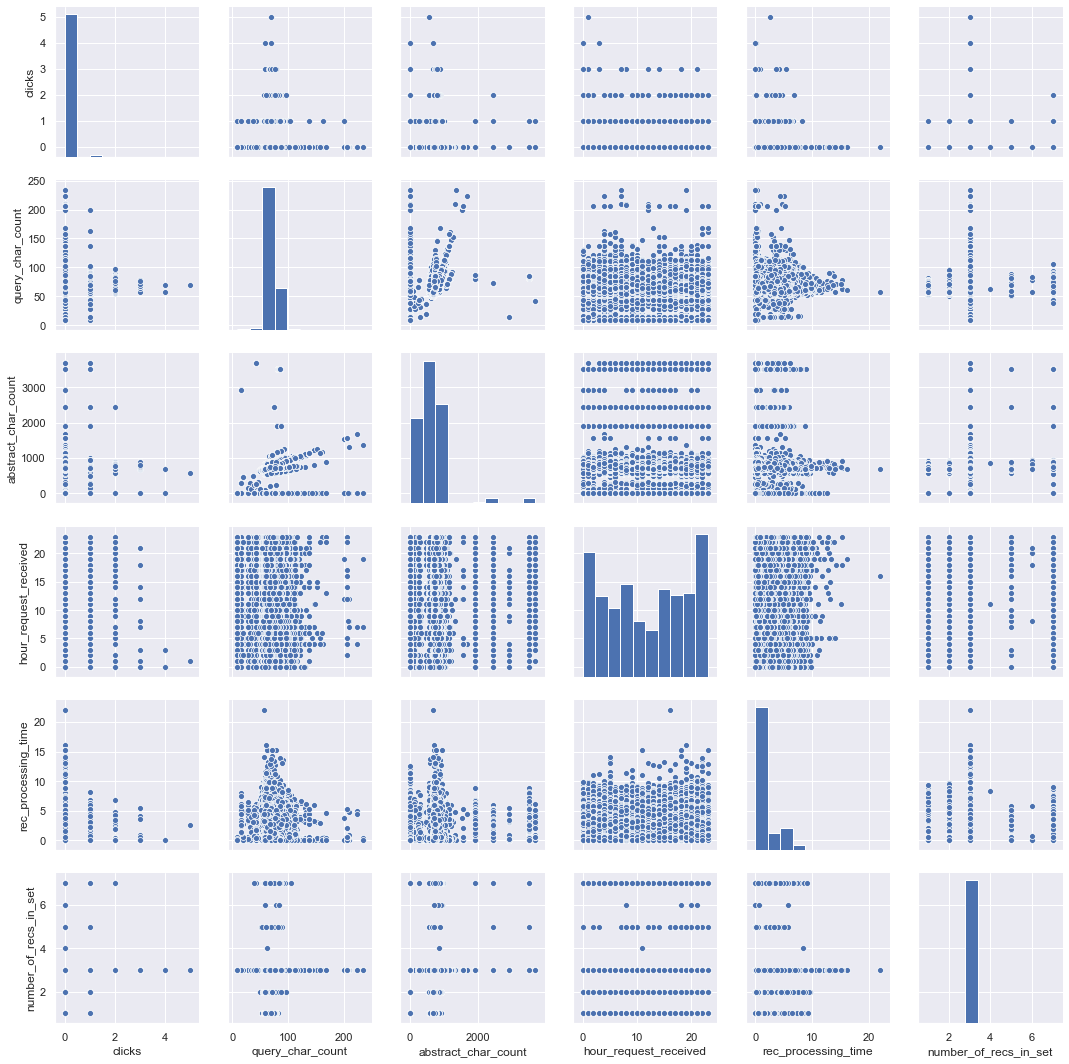

In [163]:
sns.set()
cols  = ['clicks', 'query_char_count', 'abstract_char_count', 'hour_request_received', 'rec_processing_time', 'number_of_recs_in_set']
sns.pairplot(temp_df[cols], size=2.5)
plt.show()

In [165]:
raw_train_df['algorithm_class'].value_counts

content_based_filtering    275071
sentence_embeddings         81931
unknown                     13026
stereotype                  10735
same_author                  4600
random                        324
Name: algorithm_class, dtype: int64

In [169]:
group_df = raw_train_df[raw_train_df['algorithm_class']=='content_based_filtering'][['cbf_parser', 'search_title', 'search_keywords', 'search_abstract', 'set_clicked']].groupby(['cbf_parser', 'search_title', 'search_keywords', 'search_abstract']).agg({'set_clicked':['sum', 'count']})
group_df.reset_index(inplace=True)
group_df.columns = ['cbf_parser', 'search_title', 'search_keywords', 'search_abstract', 'clicked', 'total']

In [178]:
group_df['percent_clicked'] = group_df.apply(lambda x: x['clicked']*100/x['total'], axis=1)
group_df

,cbf_parser,search_title,search_keywords,search_abstract,clicked,total,percent_clicked
0,edismax_QP,yes,no,no,600,32019,1.873887
1,edismax_QP,yes,no,yes,384,21615,1.776544
2,edismax_QP,yes,yes,no,1203,68514,1.755846
3,edismax_QP,yes,yes,yes,403,20399,1.975587
4,mlt_QP,yes,no,no,141,5979,2.358254
5,mlt_QP,yes,no,yes,104,5356,1.941748
6,mlt_QP,yes,yes,no,120,6288,1.908397
7,mlt_QP,yes,yes,yes,154,9080,1.696035
8,standard_QP,yes,no,no,798,37953,2.102601
9,standard_QP,yes,no,yes,408,23595,1.729180


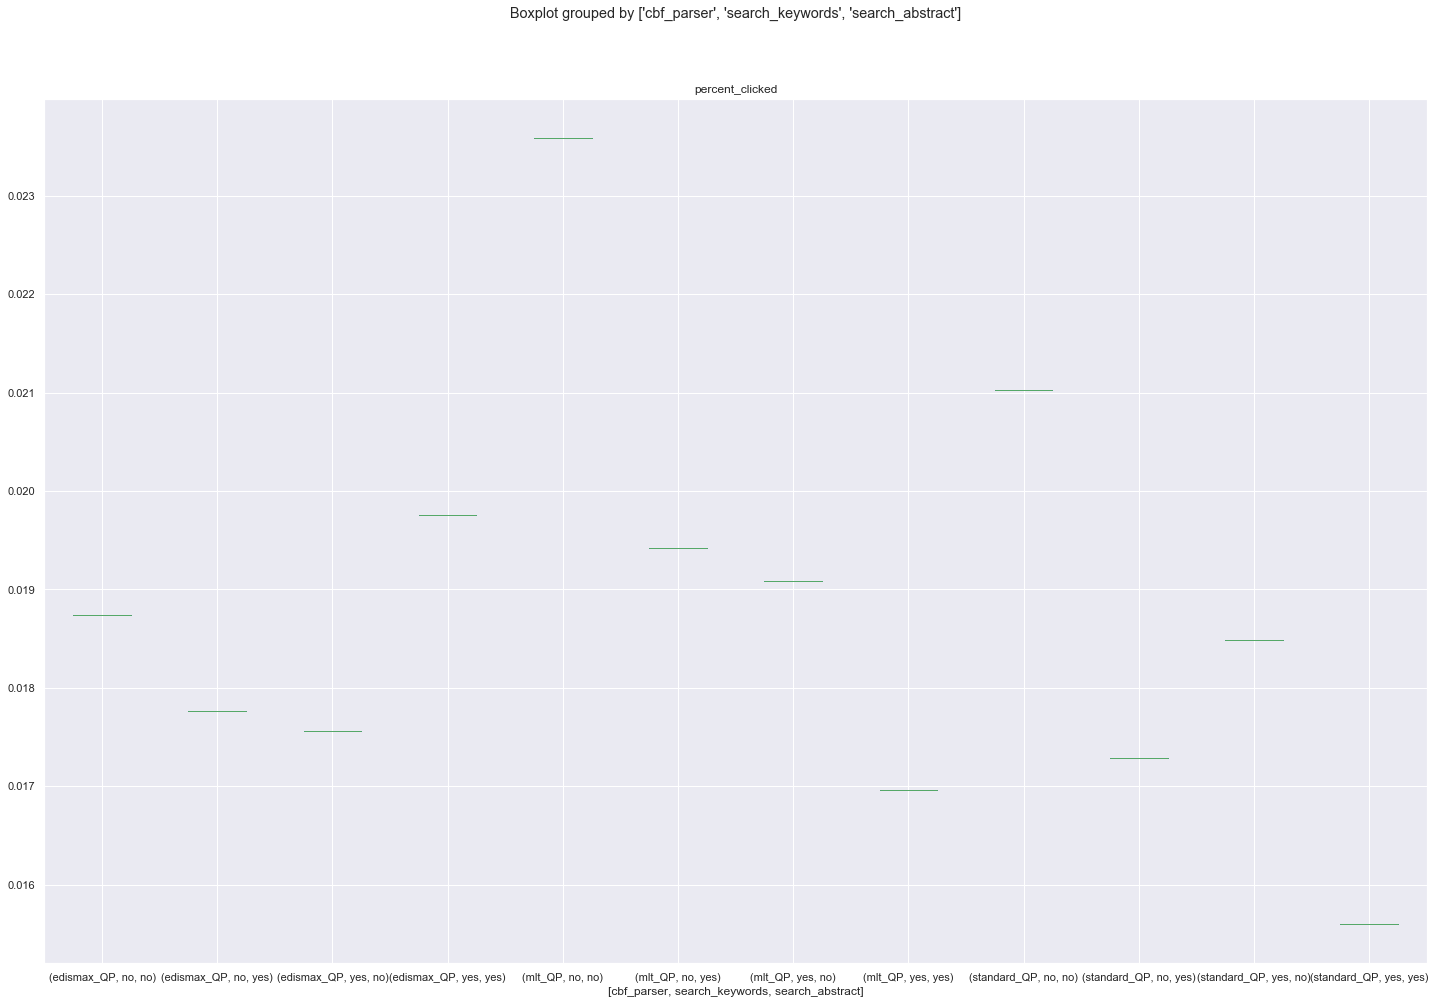

In [176]:
group_df.boxplot(column= ['percent_clicked'], by=['cbf_parser', 'search_keywords', 'search_abstract'], figsize=(24,16))


In [187]:
group_df = raw_train_df[['application_type', 'algorithm_class', 'set_clicked']].groupby(['application_type', 'algorithm_class']).agg({'set_clicked': ['sum', 'count']})
group_df.reset_index(inplace=True)
group_df.columns = ['application_type', 'algorithm_class', 'clicked', 'total']
group_df['percent_clicked'] = group_df.apply(lambda x: x['clicked']*100/x['total'], axis=1)
group_df = group_df[group_df['application_type']!='0']

In [188]:
group_df

,application_type,algorithm_class,clicked,total,percent_clicked
4,blog,content_based_filtering,114,10709,1.064525
5,blog,sentence_embeddings,37,3651,1.013421
6,blog,stereotype,0,3,0.000000
7,blog,unknown,8,849,0.942285
8,digital_library,content_based_filtering,4173,193443,2.157225
9,digital_library,random,2,324,0.617284
10,digital_library,same_author,56,4594,1.218981
11,digital_library,sentence_embeddings,989,53053,1.864174
12,digital_library,stereotype,40,8039,0.497574
13,digital_library,unknown,278,10692,2.600075


In [195]:
group_df[(group_df['application_type']!='digital_library') & (group_df['algorithm_class']!='content_based_filtering')].agg({'clicked': 'sum', 'total':'sum'})

clicked      325
total      33835
dtype: int64

In [63]:
raw_train_df['q_doc_id_provided'] = raw_train_df['query_document_id'].apply(lambda x: 1 if x!='\\N' else 0)

In [209]:
pd.set_option('display.max_rows', 500)
raw_train_df['country_by_ip'].value_counts()

DE    153319
US     57109
CN     19194
BR     12799
GB     10988
AT     10133
FR      9201
IN      6607
CH      6195
ES      6099
IT      6037
AU      6023
CA      5772
NL      5540
JP      5144
MX      3864
RU      3644
BE      3464
CO      3044
IE      2592
SE      2529
PT      2498
PL      2433
NO      2377
DK      2193
ZA      1899
PK      1790
CZ      1625
\N      1574
ID      1529
KR      1460
HK      1437
TW      1381
EC      1317
FI      1314
TR      1312
SG      1299
NZ      1185
MY      1013
GR       929
CL       856
PE       830
HU       769
IL       725
AR       672
IR       545
PH       512
DZ       496
SI       491
VN       487
RO       433
UA       430
RS       419
HR       416
TH       409
EE       406
SA       376
LU       342
EG       322
BG       312
TN       297
LT       288
KE       248
SK       222
PR       213
UY       212
MA       193
ET       191
AE       185
BD       176
VE       169
BO       167
BY       135
IQ       133
NG       132
MT       131
GH       131

In [122]:
item_type_group = raw_train_df[['item_type', 'set_clicked']].groupby(['item_type']).agg({'set_clicked': ['sum', 'count']})
item_type_group.reset_index(inplace=True)
item_type_group.columns = ['type', 'sum', 'count']
item_type_group['percentage'] = item_type_group.apply(lambda x: x['sum']/x['count'], axis=1)


,type,sum,count,percentage
0,DAB & audio,89,4877,0.018249
1,DVD players,10,1412,0.007082
2,Everything else,88,6663,0.013207
3,Gaming & toys,9,938,0.009595
4,Hard drives & NAS,158,7725,0.020453
5,Home entertainment,45,10787,0.004172
6,Music making & pedals,332,28617,0.011601
7,Networking,35,2082,0.016811
8,Photo & frames,10,916,0.010917
9,TVs & monitors,7,343,0.020408


<BarContainer object of 13 artists>

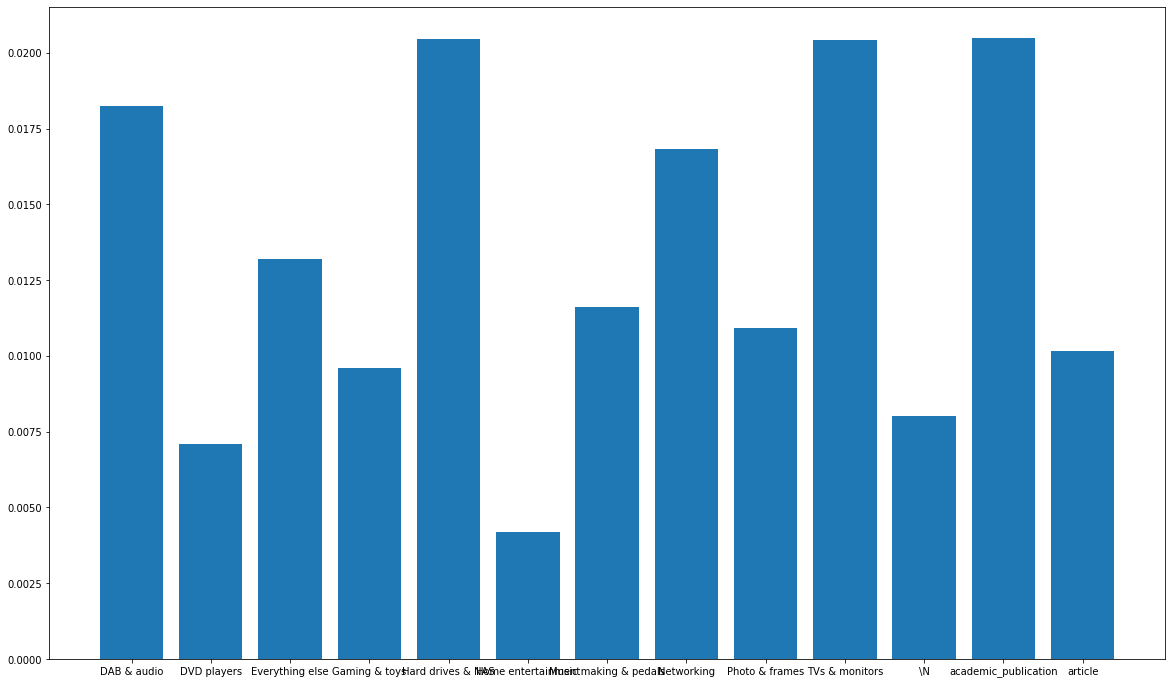

In [130]:
f, ax = plt.subplots(figsize=(20,12))
ax.bar(item_type_group['type'],item_type_group['percentage'])

In [66]:
import itertools

In [67]:
def chi_square_test(cat_cols, df):
    results = {'stat': [], 'critical': [], 'rejected_cric': [], 'p-value': [], 'alpha': [], 'rejected_p': []}
    
    for cols in list(itertools.combinations(cat_cols, 2)):
        
        c_table = pd.crosstab(df[cols[0]], df[cols[1]]).values
        stat, p, dof, expected = ss.chi2_contingency(c_table)
        prob = 0.95
        critical = ss.chi2.ppf(prob, dof)    
        alpha = 1.0 -prob
    
        results['stat'].append(abs(stat))
        results['critical'].append(critical)
        results['rejected_cric'].append(abs(stat)>= critical)
        results['p-value'].append(p)
        results['alpha'].append(alpha)
        results['rejected_p'].append(p<=alpha)

    return pd.DataFrame(results, index = list(itertools.combinations(cat_cols, 2)))
    
    

In [27]:
cat_cols = ['set_clicked', 'recommendation_algorithm_id_used', 'algorithm_class', 'query_detected_language', 'q_doc_id_provided', 'app_lang', 'timezone_by_ip', 'country_by_ip', 'cbf_parser', 'search_title', 'search_keywords', 'search_abstract']
chi_square_test(cat_cols, dig_train)

,stat,critical,rejected_cric,p-value,alpha,rejected_p
"(set_clicked, recommendation_algorithm_id_used)",2.841132e+02,60.480887,True,7.375816e-37,0.05,True
"(set_clicked, algorithm_class)",1.519090e+02,11.070498,True,5.237595e-31,0.05,True
"(set_clicked, query_detected_language)",1.223464e+02,54.572228,True,1.561788e-10,0.05,True
"(set_clicked, q_doc_id_provided)",7.318187e+01,3.841459,True,1.182368e-17,0.05,True
"(set_clicked, app_lang)",1.584204e+02,28.869299,True,1.697254e-24,0.05,True
"(set_clicked, timezone_by_ip)",7.526957e+02,209.042386,True,5.461386e-72,0.05,True
"(set_clicked, country_by_ip)",7.063776e+02,195.973362,True,4.662511e-68,0.05,True
"(set_clicked, cbf_parser)",6.482638e+01,7.814728,True,5.463838e-14,0.05,True
"(set_clicked, search_title)",3.881439e+01,3.841459,True,4.660787e-10,0.05,True
"(set_clicked, search_keywords)",5.702957e+00,3.841459,True,1.693635e-02,0.05,True


In [28]:
chi_square_test(cat_cols, pd.concat([comm_train, blog_train]))

,stat,critical,rejected_cric,p-value,alpha,rejected_p
"(set_clicked, recommendation_algorithm_id_used)",1.108632e+02,31.410433,True,1.366592e-14,0.05,True
"(set_clicked, algorithm_class)",4.348834e+00,9.487729,False,3.608500e-01,0.05,False
"(set_clicked, query_detected_language)",7.647698e+00,19.675138,False,7.444716e-01,0.05,False
"(set_clicked, q_doc_id_provided)",1.065916e+02,3.841459,True,5.470345e-25,0.05,True
"(set_clicked, app_lang)",1.104045e-02,3.841459,False,9.163175e-01,0.05,False
"(set_clicked, timezone_by_ip)",3.669533e+02,42.556968,True,3.507327e-60,0.05,True
"(set_clicked, country_by_ip)",5.465423e+02,198.154177,True,7.211609e-42,0.05,True
"(set_clicked, cbf_parser)",5.337945e+01,7.814728,True,1.521754e-11,0.05,True
"(set_clicked, search_title)",3.672272e+00,3.841459,False,5.532470e-02,0.05,False
"(set_clicked, search_keywords)",9.580294e-01,3.841459,False,3.276839e-01,0.05,False


In [29]:
chi_square_test(cat_cols, raw_train_df)

,stat,critical,rejected_cric,p-value,alpha,rejected_p
"(set_clicked, recommendation_algorithm_id_used)",5.246399e+02,60.480887,True,1.581574e-83,0.05,True
"(set_clicked, algorithm_class)",1.414845e+02,11.070498,True,8.651467e-29,0.05,True
"(set_clicked, query_detected_language)",1.426949e+02,54.572228,True,9.692997e-14,0.05,True
"(set_clicked, q_doc_id_provided)",2.822400e-01,3.841459,False,5.952368e-01,0.05,False
"(set_clicked, app_lang)",2.448400e+02,28.869299,True,9.121191e-42,0.05,True
"(set_clicked, timezone_by_ip)",1.182579e+03,210.129807,True,8.437443e-148,0.05,True
"(set_clicked, country_by_ip)",9.970911e+02,219.905770,True,1.077902e-110,0.05,True
"(set_clicked, cbf_parser)",4.547320e+01,7.814728,True,7.339928e-10,0.05,True
"(set_clicked, search_title)",4.314228e+01,3.841459,True,5.090026e-11,0.05,True
"(set_clicked, search_keywords)",4.169547e-01,3.841459,False,5.184605e-01,0.05,False


In [134]:
chi_square_test(['set_clicked'] + cblog_cat_cols, cblog_train_all)

,stat,critical,rejected_cric,p-value,alpha,rejected_p
"(clicks, set_clicked)",2.829700e+04,1.259159e+01,True,0.000000e+00,0.05,True
"(clicks, query_detected_language)",3.176536e-01,2.886930e+01,False,1.000000e+00,0.05,False
"(clicks, organization_id)",6.342766e+01,1.259159e+01,True,9.030188e-12,0.05,True
"(clicks, application_type)",6.342766e+01,1.259159e+01,True,9.030188e-12,0.05,True
"(clicks, hour_request_received)",1.321949e+02,1.664153e+02,False,6.233015e-01,0.05,False
"(clicks, item_type)",1.165026e+02,7.908194e+01,True,1.719277e-05,0.05,True
"(clicks, rec_processing_time)",1.666892e+05,1.661265e+05,True,4.410085e-03,0.05,True
"(clicks, country_by_ip)",8.227200e+02,9.895982e+02,False,9.889864e-01,0.05,False
"(clicks, timezone_by_ip)",5.759518e+02,1.992442e+02,True,4.082453e-46,0.05,True
"(clicks, local_hour_of_request)",2.162303e+02,1.664153e+02,True,2.346928e-05,0.05,True


In [143]:
chi_square_test(['set_clicked'] + jabref_cat_cols, dig_train_all)

,stat,critical,rejected_cric,p-value,alpha,rejected_p
"(clicks, set_clicked)",1.703520e+05,2.102607e+01,True,0.000000e+00,0.05,True
"(clicks, query_detected_language)",2.083014e+03,4.179736e+02,True,2.608246e-235,0.05,True
"(clicks, q_doc_id_provided)",6.060777e+01,2.102607e+01,True,1.748681e-08,0.05,True
"(clicks, hour_request_received)",3.092670e+02,3.157485e+02,False,8.213582e-02,0.05,False
"(clicks, rec_processing_time)",1.949959e+06,1.907119e+06,True,1.616299e-121,0.05,True
"(clicks, country_by_ip)",1.360347e+04,1.961447e+03,True,0.000000e+00,0.05,True
"(clicks, timezone_by_ip)",8.548034e+02,4.179736e+02,True,5.203500e-40,0.05,True
"(clicks, local_hour_of_request)",5.219741e+02,3.157485e+02,True,2.243825e-17,0.05,True
"(clicks, number_of_recs_in_set)",1.274901e+02,9.280827e+01,True,6.127200e-05,0.05,True
"(clicks, algorithm_class)",0.000000e+00,NaN,False,1.000000e+00,0.05,False


In [76]:
chi_square_test(['set_clicked'] + jabref_cat_cols, dig_train)

,stat,critical,rejected_cric,p-value,alpha,rejected_p
"(set_clicked, query_detected_language)",34.575114,43.772972,False,2.584282e-01,0.05,False
"(set_clicked, q_doc_id_provided)",1.365978,3.841459,False,2.425042e-01,0.05,False
"(set_clicked, hour_request_received)",27.935968,35.172462,False,2.182127e-01,0.05,False
"(set_clicked, country_by_ip)",345.641386,168.612954,True,2.110328e-19,0.05,True
"(set_clicked, timezone_by_ip)",118.919944,43.772972,True,1.546737e-12,0.05,True
"(set_clicked, local_hour_of_request)",53.637678,35.172462,True,3.000959e-04,0.05,True
"(set_clicked, number_of_recs_in_set)",3.960355,12.591587,False,6.820416e-01,0.05,False
"(set_clicked, algorithm_class)",75.137771,9.487729,True,1.863277e-15,0.05,True
"(set_clicked, recommendation_algorithm_id_used)",99.239835,30.143527,True,7.351050e-13,0.05,True
"(set_clicked, app_lang)",77.008394,23.684791,True,1.011172e-10,0.05,True


In [77]:
pd.set_option('display.max_rows', 500)
chi_square_test(['set_clicked'] + jabref_cat_cols+ cbf_cols, dig_cbf_train)

,stat,critical,rejected_cric,p-value,alpha,rejected_p
"(set_clicked, query_detected_language)",8.910633e+01,44.985343,True,1.582564e-07,0.05,True
"(set_clicked, q_doc_id_provided)",5.343992e+01,3.841459,True,2.666229e-13,0.05,True
"(set_clicked, hour_request_received)",3.057318e+01,35.172462,False,1.336446e-01,0.05,False
"(set_clicked, country_by_ip)",6.084369e+02,185.052332,True,5.629703e-55,0.05,True
"(set_clicked, timezone_by_ip)",2.149546e+02,44.985343,True,2.063877e-29,0.05,True
"(set_clicked, local_hour_of_request)",3.748768e+01,35.172462,True,2.888594e-02,0.05,True
"(set_clicked, number_of_recs_in_set)",2.284497e+01,12.591587,True,8.500997e-04,0.05,True
"(set_clicked, algorithm_class)",0.000000e+00,NaN,False,1.000000e+00,0.05,False
"(set_clicked, recommendation_algorithm_id_used)",7.790265e+01,35.172462,True,6.916659e-08,0.05,True
"(set_clicked, app_lang)",1.026524e+02,27.587112,True,2.861943e-14,0.05,True


In [90]:
chi_square_test(['set_clicked'] + cblog_cat_cols, cblog_train)

,stat,critical,rejected_cric,p-value,alpha,rejected_p
"(set_clicked, query_detected_language)",0.084098,5.991465,False,9.588227e-01,0.05,False
"(set_clicked, organization_id)",0.533342,3.841459,False,4.652053e-01,0.05,False
"(set_clicked, application_type)",0.533342,3.841459,False,4.652053e-01,0.05,False
"(set_clicked, hour_request_received)",35.616939,35.172462,True,4.511813e-02,0.05,True
"(set_clicked, item_type)",33.963209,18.307038,True,1.873672e-04,0.05,True
"(set_clicked, country_by_ip)",120.116591,159.813547,False,7.621356e-01,0.05,False
"(set_clicked, abstract_detected_language)",0.000000,NaN,False,1.000000e+00,0.05,False
"(set_clicked, number_of_recs_in_set)",0.581482,7.814728,False,9.006583e-01,0.05,False
"(set_clicked, algorithm_class)",6.857077,7.814728,False,7.659545e-02,0.05,False
"(set_clicked, recommendation_algorithm_id_used)",7.055650,15.507313,False,5.306405e-01,0.05,False


In [89]:
pd.set_option('display.max_rows', 500)
chi_square_test(['set_clicked'] + cblog_cat_cols+cbf_cols, cblog_cbf_train)

,stat,critical,rejected_cric,p-value,alpha,rejected_p
"(set_clicked, query_detected_language)",0.261669,7.814728,False,9.670686e-01,0.05,False
"(set_clicked, organization_id)",4.390795,3.841459,True,3.613347e-02,0.05,True
"(set_clicked, application_type)",4.390795,3.841459,True,3.613347e-02,0.05,True
"(set_clicked, hour_request_received)",27.443869,35.172462,False,2.375446e-01,0.05,False
"(set_clicked, item_type)",125.542201,18.307038,True,3.782646e-22,0.05,True
"(set_clicked, country_by_ip)",378.231528,185.052332,True,1.102461e-20,0.05,True
"(set_clicked, abstract_detected_language)",0.000000,NaN,False,1.000000e+00,0.05,False
"(set_clicked, number_of_recs_in_set)",7.194553,12.591587,False,3.032293e-01,0.05,False
"(set_clicked, algorithm_class)",0.000000,NaN,False,1.000000e+00,0.05,False
"(set_clicked, recommendation_algorithm_id_used)",55.757978,19.675138,True,5.628608e-08,0.05,True


In [254]:
for col in cat_cols:
    print('Column: ', col, ' Categories: ', len(raw_train_df[col].value_counts()))

Column:  clicks  Categories:  14
Column:  query_detected_language  Categories:  40
Column:  q_doc_id_provided  Categories:  2
Column:  item_type  Categories:  13
Column:  app_version  Categories:  153
Column:  app_lang  Categories:  19
Column:  timezone_by_ip  Categories:  179
Column:  country_by_ip  Categories:  188


In [284]:
(~raw_train_df.isin(["\\N"])).all(axis=1)

False

In [64]:
jabref_cols = ['query_word_count', 'query_char_count', 'query_detected_language', 'q_doc_id_provided', 'hour_request_received', 
               'response_delivered', 'rec_processing_time', 'app_lang', 'app_version', 'country_by_ip', 'timezone_by_ip', 
               'local_hour_of_request', 'number_of_recs_in_set', 'algorithm_class', 'recommendation_algorithm_id_used', 
               'clicks', 'ctr', 'set_clicked']

cbf_cols = ['cbf_parser', 'search_title', 'search_keywords', 'search_abstract']

com_blog_cols = ['query_word_count', 'query_char_count', 'query_detected_language', 'abstract_char_count', 'abstract_word_count',
                 'organization_id', 'abstract_detected_language', 'application_type', 'hour_request_received', 'item_type',
                 'response_delivered', 'country_by_ip', 
                 'number_of_recs_in_set', 'algorithm_class', 'recommendation_algorithm_id_used', 'clicks', 'ctr', 'set_clicked']

In [182]:
raw_train_df[raw_train_df['recommendation_algorithm_id_used']==32]['set_clicked'].value_counts()

0    2330
1      19
Name: set_clicked, dtype: int64

In [ ]:
def data_cleaning(df):
    df = df[df['clicks']<= df["number_of_recs_in_set"]]

In [65]:
#temp_df = raw_train_df.loc[(~raw_train_df.isin(["\\N"])).all(axis=1)[(~raw_train_df.isin(["\\N"])).all(axis=1)==True].index, :]

cblog_train_all = raw_train_df[(raw_train_df['application_type']=='blog') | (raw_train_df['application_type']=='e-commerce')][com_blog_cols+cbf_cols]
cblog_cbf_train = cblog_train_all[cblog_train_all['algorithm_class']=='content_based_filtering']
print(len(cblog_cbf_train))
cblog_train = raw_train_df[(raw_train_df['application_type']=='blog') | (raw_train_df['application_type']=='e-commerce')][com_blog_cols]
cblog_train = cblog_train[cblog_train['algorithm_class']!='content_based_filtering']
print(len(cblog_train))

cblog_train_all = cblog_train_all.loc[(~cblog_train_all.isin(["\\N"])).all(axis=1)[(~cblog_train_all.isin(["\\N"])).all(axis=1)==True].index, :]
cblog_cbf_train = cblog_cbf_train.loc[(~cblog_cbf_train.isin(["\\N"])).all(axis=1)[(~cblog_cbf_train.isin(["\\N"])).all(axis=1)==True].index, :]
print(len(cblog_cbf_train))
cblog_train = cblog_train.loc[(~cblog_train.isin(["\\N"])).all(axis=1)[(~cblog_train.isin(["\\N"])).all(axis=1)==True].index, :]
print(len(cblog_train))

dig_train_all = raw_train_df[raw_train_df['application_type']=='digital_library'][jabref_cols+cbf_cols]
dig_cbf_train = dig_train_all[dig_train_all['algorithm_class']=='content_based_filtering']
print(len(dig_cbf_train))
dig_train = raw_train_df[raw_train_df['application_type']=='digital_library'][jabref_cols]
dig_train = dig_train[dig_train['algorithm_class']!='content_based_filtering']
print(len(dig_train))

dig_train_all = dig_train_all.loc[(~dig_train_all.isin(["\\N"])).all(axis=1)[(~dig_train_all.isin(["\\N"])).all(axis=1)==True].index, :]
dig_cbf_train = dig_cbf_train.loc[(~dig_cbf_train.isin(["\\N"])).all(axis=1)[(~dig_cbf_train.isin(["\\N"])).all(axis=1)==True].index, :]
print(len(dig_cbf_train))
dig_train = dig_train.loc[(~dig_train.isin(["\\N"])).all(axis=1)[(~dig_train.isin(["\\N"])).all(axis=1)==True].index, :]
print(len(dig_train))

81447
33835
54461
24328
193443
76702
170352
60944


In [149]:
cblog_train_all = raw_train_df[(raw_train_df['application_type']=='blog') | (raw_train_df['application_type']=='e-commerce')][com_blog_cols+cbf_cols]

In [152]:
for col in cblog_train_all.columns:
    if '\\N' in cblog_train_all[col].value_counts().index:
        print(col ,': ' , cblog_train_all[col].value_counts().loc['\\N'])

abstract_char_count :  25418
abstract_word_count :  25418
abstract_detected_language :  25418
item_type :  35968
country_by_ip :  295
timezone_by_ip :  60464
local_hour_of_request :  60464
cbf_parser :  33835


In [109]:
temp_df = raw_train_df[['query_word_count', 'query_char_count', 'query_detected_language',
                 'organization_id', 'application_type', 'hour_request_received', 'item_type'
                 'response_delivered', 'rec_processing_time', 'country_by_ip', 'timezone_by_ip', 'local_hour_of_request',
                 'number_of_recs_in_set', 'algorithm_class', 'recommendation_algorithm_id_used', 'clicks', 'ctr', 'set_clicked',
                       'app_version', 'app_lang']]

In [96]:
def cramers_corrected_stat(df, cat_cols):
    """ calculate Cramers V statistic for categorical-categorical association.
        uses correction from Bergsma and Wicher, 
        Journal of the Korean Statistical Society 42 (2013): 323-328
    """
    results = {'stat': [], 'sqrt_df': []}
    for cols in list(itertools.combinations(cat_cols, 2)):
        confusion_matrix = pd.crosstab(df[cols[0]], df[cols[1]])
        chi2 = ss.chi2_contingency(confusion_matrix)[0]
        n = confusion_matrix.sum().sum()
        phi2 = chi2/n
        r,k = confusion_matrix.shape
        phi2corr = max(0, phi2 - ((k-1)*(r-1))/(n-1))    
        rcorr = r - ((r-1)**2)/(n-1)
        kcorr = k - ((k-1)**2)/(n-1)
        
        results['stat'].append(np.sqrt(phi2corr / min( (kcorr-1), (rcorr-1))))
        results['sqrt_df'].append(np.sqrt(min((kcorr-1), (rcorr-1))))
        
    return pd.DataFrame(results, index = list(itertools.combinations(cat_cols, 2)))

In [30]:
pd.set_option('display.max_rows', 100)
cramers_corrected_stat(temp_df, cat_cols)

C:\ProgramData\Anaconda3\envs\kaggle\lib\site-packages\ipykernel_launcher.py:17: RuntimeWarning: invalid value encountered in double_scalars


,0
"(set_clicked, recommendation_algorithm_id_used)",0.017952
"(set_clicked, algorithm_class)",NaN
"(set_clicked, query_detected_language)",0.018469
"(set_clicked, q_doc_id_provided)",0.017545
"(set_clicked, app_lang)",0.022428
"(set_clicked, timezone_by_ip)",0.032861
"(set_clicked, country_by_ip)",0.051593
"(set_clicked, cbf_parser)",0.011492
"(set_clicked, search_title)",NaN
"(set_clicked, search_keywords)",0.000000


In [82]:
dig_cbf_train.dtypes

query_word_count                     object
query_char_count                     object
query_detected_language              object
q_doc_id_provided                     int64
organization_id                       int64
application_type                     object
hour_request_received                 int64
response_delivered                   object
rec_processing_time                 float64
app_lang                             object
app_version                          object
country_by_ip                        object
timezone_by_ip                       object
local_hour_of_request                object
number_of_recs_in_set                 int64
algorithm_class                      object
recommendation_algorithm_id_used     object
clicks                                int64
ctr                                 float64
set_clicked                           int64
cbf_parser                           object
search_title                         object
search_keywords                 

In [82]:
num_cols = ['query_word_count', 'query_char_count']
cblog_num_cols = num_cols + ['abstract_char_count', 'abstract_word_count']

cblog_cbf_train[cblog_num_cols] = cblog_cbf_train[cblog_num_cols].astype('int64')
cblog_train[cblog_num_cols] = cblog_train[cblog_num_cols].astype('int64')
cblog_train_all[cblog_num_cols] = cblog_train_all[cblog_num_cols].astype('int64')
dig_cbf_train[num_cols] = dig_cbf_train[num_cols].astype('int64')
dig_train[num_cols] = dig_train[num_cols].astype('int64')
dig_train_all[num_cols] = dig_train_all[num_cols].astype('int64')

In [64]:
raw_train_df['local_hour_of_request'].value_counts()

\N    85059
15    25970
14    25184
16    24699
11    24670
13    22194
10    21499
12    20379
17    20207
18    15276
9     14674
19    13159
20    12983
21    12185
22    10923
23     8737
8      7219
0      5768
1      3718
7      3086
2      2400
6      1677
3      1594
5      1237
4      1190
Name: local_hour_of_request, dtype: int64

In [88]:
cblog_cat_cols = ['query_detected_language', 'organization_id', 
                  'application_type', 'hour_request_received', 'item_type',
                  'country_by_ip', 'abstract_detected_language',
                  'number_of_recs_in_set', 'algorithm_class', 'recommendation_algorithm_id_used']

jabref_cat_cols = ['query_detected_language', 'q_doc_id_provided'
                   ,'hour_request_received', 'country_by_ip', 'timezone_by_ip', 'local_hour_of_request',
                  'number_of_recs_in_set', 'algorithm_class', 'recommendation_algorithm_id_used', 'app_lang', 'app_version']



In [70]:
set(cblog_cbf_train['abstract_detected_language'])

{'en'}

In [172]:
cram_df = cramers_corrected_stat(cblog_train, cblog_cat_cols)
cram_df['stat_new'] = cram_df.apply(lambda x: x['stat']*x['sqrt_df'], axis=1)
cram_df

,stat,sqrt_df,stat_new
"(clicks, set_clicked)",0.999877,0.999979,0.999856
"(clicks, query_detected_language)",0.000000,1.414155,0.000000
"(clicks, organization_id)",0.033918,0.999979,0.033917
"(clicks, application_type)",0.033918,0.999979,0.033917
"(clicks, hour_request_received)",0.014425,2.645371,0.038159
"(clicks, item_type)",0.005330,2.645371,0.014100
"(clicks, country_by_ip)",0.031472,2.645371,0.083255
"(clicks, number_of_recs_in_set)",0.013944,1.731944,0.024151
"(clicks, algorithm_class)",0.004250,1.731944,0.007360
"(clicks, recommendation_algorithm_id_used)",0.000000,2.645371,0.000000


In [97]:
pd.set_option('display.max_rows', 200)
cram_df = cramers_corrected_stat(cblog_cbf_train, cblog_cat_cols+cbf_cols)
cram_df['stat_new'] = cram_df.apply(lambda x: x['stat']*x['sqrt_df'], axis=1)
cram_df

C:\ProgramData\Anaconda3\envs\kaggle\lib\site-packages\ipykernel_launcher.py:17: RuntimeWarning: invalid value encountered in double_scalars


,stat,sqrt_df,stat_new
"(query_detected_language, organization_id)",0.039275,0.999991,0.039275
"(query_detected_language, application_type)",0.039275,0.999991,0.039275
"(query_detected_language, hour_request_received)",0.000000,1.732003,0.000000
"(query_detected_language, item_type)",0.030043,1.732003,0.052035
"(query_detected_language, country_by_ip)",0.032827,1.732003,0.056856
"(query_detected_language, abstract_detected_language)",NaN,0.000000,NaN
"(query_detected_language, number_of_recs_in_set)",0.020614,1.732003,0.035703
"(query_detected_language, algorithm_class)",NaN,0.000000,NaN
"(query_detected_language, recommendation_algorithm_id_used)",0.012534,1.732003,0.021709
"(query_detected_language, cbf_parser)",0.006650,1.414188,0.009405


In [106]:
pd.set_option('display.max_rows', 200)
cram_df = cramers_corrected_stat(dig_train, jabref_cat_cols)
cram_df['stat_new'] = cram_df.apply(lambda x: x['stat']*x['sqrt_df'], axis=1)
cram_df

C:\ProgramData\Anaconda3\envs\kaggle\lib\site-packages\ipykernel_launcher.py:17: RuntimeWarning: invalid value encountered in double_scalars


,stat,sqrt_df,stat_new
"(clicks, set_clicked)",0.999918,0.999992,0.999910
"(clicks, query_detected_language)",0.005010,3.316325,0.016614
"(clicks, organization_id)",NaN,0.000000,NaN
"(clicks, application_type)",NaN,0.000000,NaN
"(clicks, q_doc_id_provided)",0.009455,0.999992,0.009455
"(clicks, hour_request_received)",0.004773,3.316325,0.015830
"(clicks, rec_processing_time)",0.093818,3.316325,0.311131
"(clicks, country_by_ip)",0.021274,3.316325,0.070552
"(clicks, timezone_by_ip)",0.014224,3.316325,0.047170
"(clicks, local_hour_of_request)",0.007384,3.316325,0.024489


In [107]:
pd.set_option('display.max_rows', 200)
cram_df = cramers_corrected_stat(dig_cbf_train, jabref_cat_cols+cbf_cols)
cram_df['stat_new'] = cram_df.apply(lambda x: x['stat']*x['sqrt_df'], axis=1)
cram_df

C:\ProgramData\Anaconda3\envs\kaggle\lib\site-packages\ipykernel_launcher.py:17: RuntimeWarning: invalid value encountered in double_scalars


,stat,sqrt_df,stat_new
"(clicks, set_clicked)",0.999968,0.999997,0.999965
"(clicks, query_detected_language)",0.028932,3.463980,0.100220
"(clicks, organization_id)",NaN,0.000000,NaN
"(clicks, application_type)",NaN,0.000000,NaN
"(clicks, q_doc_id_provided)",0.016892,0.999997,0.016892
"(clicks, hour_request_received)",0.004034,3.463980,0.013974
"(clicks, rec_processing_time)",0.150078,3.463980,0.519866
"(clicks, country_by_ip)",0.075798,3.463980,0.262562
"(clicks, timezone_by_ip)",0.015369,3.463980,0.053237
"(clicks, local_hour_of_request)",0.010970,3.463980,0.037999


In [144]:
pd.set_option('display.max_rows', 200)
cram_df = cramers_corrected_stat(dig_train_all, jabref_cat_cols+cbf_cols)
cram_df['stat_new'] = cram_df.apply(lambda x: x['stat']*x['sqrt_df'], axis=1)
cram_df

C:\ProgramData\Anaconda3\envs\kaggle\lib\site-packages\ipykernel_launcher.py:17: RuntimeWarning: invalid value encountered in double_scalars


,stat,sqrt_df,stat_new
"(clicks, set_clicked)",0.999968,0.999997,0.999965
"(clicks, query_detected_language)",0.028932,3.463980,0.100220
"(clicks, q_doc_id_provided)",0.016892,0.999997,0.016892
"(clicks, hour_request_received)",0.004034,3.463980,0.013974
"(clicks, rec_processing_time)",0.150078,3.463980,0.519866
"(clicks, country_by_ip)",0.075798,3.463980,0.262562
"(clicks, timezone_by_ip)",0.015369,3.463980,0.053237
"(clicks, local_hour_of_request)",0.010970,3.463980,0.037999
"(clicks, number_of_recs_in_set)",0.007368,2.449447,0.018048
"(clicks, algorithm_class)",NaN,0.000000,NaN


In [158]:
pd.set_option('display.max_rows', 200)
cram_df = cramers_corrected_stat(cblog_train_all, cblog_cat_cols+cbf_cols)
cram_df['stat_new'] = cram_df.apply(lambda x: x['stat']*x['sqrt_df'], axis=1)
cram_df

C:\ProgramData\Anaconda3\envs\kaggle\lib\site-packages\ipykernel_launcher.py:17: RuntimeWarning: invalid value encountered in double_scalars


,stat,sqrt_df,stat_new
"(clicks, set_clicked)",0.999954,0.999991,0.999945
"(clicks, query_detected_language)",0.000000,1.732003,0.000000
"(clicks, organization_id)",0.029977,0.999991,0.029976
"(clicks, application_type)",0.029977,0.999991,0.029976
"(clicks, hour_request_received)",0.000000,2.449355,0.000000
"(clicks, item_type)",0.019799,2.449355,0.048496
"(clicks, country_by_ip)",0.075458,2.449355,0.184823
"(clicks, number_of_recs_in_set)",0.011023,2.449355,0.026999
"(clicks, algorithm_class)",NaN,0.000000,NaN
"(clicks, recommendation_algorithm_id_used)",0.011733,2.449355,0.028739


In [96]:
dig_train.corr()

,query_word_count,query_char_count,q_doc_id_provided,organization_id,hour_request_received,rec_processing_time,local_hour_of_request,number_of_recs_in_set,clicks,ctr,set_clicked
query_word_count,1.000000,0.952625,-0.056622,NaN,-0.026262,0.011959,-0.013988,0.056798,0.005404,0.004877,0.003715
query_char_count,0.952625,1.000000,-0.068008,NaN,-0.022264,0.009112,-0.016395,0.055255,0.004681,0.004192,0.002889
q_doc_id_provided,-0.056622,-0.068008,1.000000,NaN,-0.005457,0.012086,0.011852,-0.042539,0.005005,0.005513,0.004871
organization_id,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
hour_request_received,-0.026262,-0.022264,-0.005457,NaN,1.000000,-0.006180,0.452757,-0.008812,-0.005112,-0.004574,-0.004930
rec_processing_time,0.011959,0.009112,0.012086,NaN,-0.006180,1.000000,0.011495,0.001949,-0.000832,-0.000839,-0.001081
local_hour_of_request,-0.013988,-0.016395,0.011852,NaN,0.452757,0.011495,1.000000,-0.003692,-0.005370,-0.004989,-0.005452
number_of_recs_in_set,0.056798,0.055255,-0.042539,NaN,-0.008812,0.001949,-0.003692,1.000000,0.003120,-0.004329,0.003316
clicks,0.005404,0.004681,0.005005,NaN,-0.005112,-0.000832,-0.005370,0.003120,1.000000,0.996867,0.814744
ctr,0.004877,0.004192,0.005513,NaN,-0.004574,-0.000839,-0.004989,-0.004329,0.996867,1.000000,0.814079


In [83]:
dig_train.corr()

,query_word_count,query_char_count,q_doc_id_provided,hour_request_received,rec_processing_time,number_of_recs_in_set,clicks,ctr,set_clicked
query_word_count,1.000000,0.952625,-0.056622,-0.026262,0.011959,0.056798,0.005404,0.004877,0.003715
query_char_count,0.952625,1.000000,-0.068008,-0.022264,0.009112,0.055255,0.004681,0.004192,0.002889
q_doc_id_provided,-0.056622,-0.068008,1.000000,-0.005457,0.012086,-0.042539,0.005005,0.005513,0.004871
hour_request_received,-0.026262,-0.022264,-0.005457,1.000000,-0.006180,-0.008812,-0.005112,-0.004574,-0.004930
rec_processing_time,0.011959,0.009112,0.012086,-0.006180,1.000000,0.001949,-0.000832,-0.000839,-0.001081
number_of_recs_in_set,0.056798,0.055255,-0.042539,-0.008812,0.001949,1.000000,0.003120,-0.004329,0.003316
clicks,0.005404,0.004681,0.005005,-0.005112,-0.000832,0.003120,1.000000,0.996867,0.814744
ctr,0.004877,0.004192,0.005513,-0.004574,-0.000839,-0.004329,0.996867,1.000000,0.814079
set_clicked,0.003715,0.002889,0.004871,-0.004930,-0.001081,0.003316,0.814744,0.814079,1.000000


In [84]:
dig_cbf_train.corr()

,query_word_count,query_char_count,q_doc_id_provided,hour_request_received,rec_processing_time,number_of_recs_in_set,clicks,ctr,set_clicked
query_word_count,1.000000,0.949050,-0.073512,-0.027755,0.364887,0.055337,0.007491,0.005578,0.002550
query_char_count,0.949050,1.000000,-0.085979,-0.022631,0.314125,0.056739,0.004420,0.002535,0.000289
q_doc_id_provided,-0.073512,-0.085979,1.000000,-0.010872,-0.013592,-0.176172,0.013042,0.018807,0.017757
hour_request_received,-0.027755,-0.022631,-0.010872,1.000000,-0.013832,-0.000381,-0.002990,-0.003265,-0.005088
rec_processing_time,0.364887,0.314125,-0.013592,-0.013832,1.000000,0.037847,-0.005341,-0.006236,-0.010226
number_of_recs_in_set,0.055337,0.056739,-0.176172,-0.000381,0.037847,1.000000,-0.003531,-0.040342,-0.005407
clicks,0.007491,0.004420,0.013042,-0.002990,-0.005341,-0.003531,1.000000,0.961420,0.807907
ctr,0.005578,0.002535,0.018807,-0.003265,-0.006236,-0.040342,0.961420,1.000000,0.783317
set_clicked,0.002550,0.000289,0.017757,-0.005088,-0.010226,-0.005407,0.807907,0.783317,1.000000


cblog_train.corr()

In [85]:
cblog_cbf_train.corr()

,query_word_count,query_char_count,abstract_char_count,abstract_word_count,organization_id,hour_request_received,number_of_recs_in_set,clicks,ctr,set_clicked
query_word_count,1.000000,0.930165,-0.539870,-0.450112,0.639038,0.025638,0.607992,0.014991,0.004894,0.007210
query_char_count,0.930165,1.000000,-0.556109,-0.516367,0.682007,0.030857,0.646637,0.016841,0.004206,0.005984
abstract_char_count,-0.539870,-0.556109,1.000000,0.976781,-0.954355,-0.042479,-0.894341,-0.003277,0.014759,0.011787
abstract_word_count,-0.450112,-0.516367,0.976781,1.000000,-0.926679,-0.041910,-0.867256,-0.001795,0.015852,0.012896
organization_id,0.639038,0.682007,-0.954355,-0.926679,1.000000,0.048267,0.939826,0.006023,-0.012787,-0.009192
hour_request_received,0.025638,0.030857,-0.042479,-0.041910,0.048267,1.000000,0.047831,0.006886,0.005373,0.006911
number_of_recs_in_set,0.607992,0.646637,-0.894341,-0.867256,0.939826,0.047831,1.000000,0.008190,-0.011743,-0.006853
clicks,0.014991,0.016841,-0.003277,-0.001795,0.006023,0.006886,0.008190,1.000000,0.971640,0.874478
ctr,0.004894,0.004206,0.014759,0.015852,-0.012787,0.005373,-0.011743,0.971640,1.000000,0.912096
set_clicked,0.007210,0.005984,0.011787,0.012896,-0.009192,0.006911,-0.006853,0.874478,0.912096,1.000000


In [86]:
cblog_train.corr()

,query_word_count,query_char_count,abstract_char_count,abstract_word_count,organization_id,hour_request_received,number_of_recs_in_set,clicks,ctr,set_clicked
query_word_count,1.000000,0.927956,-0.514819,-0.425435,0.613256,0.036502,0.590462,0.017976,0.008564,0.009576
query_char_count,0.927956,1.000000,-0.534989,-0.498512,0.660432,0.040932,0.635740,0.022573,0.010948,0.009725
abstract_char_count,-0.514819,-0.534989,1.000000,0.976983,-0.954635,-0.045157,-0.916431,-0.008145,0.010089,0.009782
abstract_word_count,-0.425435,-0.498512,0.976983,1.000000,-0.927344,-0.044957,-0.890161,-0.007054,0.011055,0.011527
organization_id,0.613256,0.660432,-0.954635,-0.927344,1.000000,0.055644,0.959995,0.012990,-0.005226,-0.005212
hour_request_received,0.036502,0.040932,-0.045157,-0.044957,0.055644,1.000000,0.059311,0.001537,0.001780,0.005591
number_of_recs_in_set,0.590462,0.635740,-0.916431,-0.890161,0.959995,0.059311,1.000000,0.012459,-0.005843,-0.004689
clicks,0.017976,0.022573,-0.008145,-0.007054,0.012990,0.001537,0.012459,1.000000,0.971041,0.841111
ctr,0.008564,0.010948,0.010089,0.011055,-0.005226,0.001780,-0.005843,0.971041,1.000000,0.906266
set_clicked,0.009576,0.009725,0.009782,0.011527,-0.005212,0.005591,-0.004689,0.841111,0.906266,1.000000


In [183]:
for col in raw_train_df.columns:
    if '\\N' in raw_train_df[col].value_counts().index:
        print(col ,': ' , raw_train_df[col].value_counts().loc['\\N'], ' ,', int(raw_train_df[col].value_counts().loc['\\N']*100/385687))

user_id :  333849  , 86
session_id :  333849  , 86
query_identifier :  154  , 0
query_word_count :  154  , 0
query_char_count :  154  , 0
query_detected_language :  3597  , 0
query_document_id :  220470  , 57
document_language_provided :  381260  , 98
year_published :  315710  , 81
number_of_authors :  316412  , 82
abstract_word_count :  238869  , 61
abstract_char_count :  238869  , 61
abstract_detected_language :  238869  , 61
first_author_id :  319231  , 82
num_pubs_by_first_author :  319231  , 82
item_type :  36223  , 9
app_version :  115523  , 29
app_lang :  16617  , 4
user_os :  384369  , 99
user_os_version :  385674  , 99
user_java_version :  385680  , 99
user_timezone :  384363  , 99
country_by_ip :  1574  , 0
timezone_by_ip :  76209  , 19
local_time_of_request :  85059  , 22
local_hour_of_request :  85059  , 22
recommendation_algorithm_id_used :  10677  , 2
cbf_parser :  110616  , 28
time_recs_recieved :  330975  , 85
time_recs_displayed :  331317  , 85
time_recs_viewed :  3725

In [212]:
raw_train_df = raw_train_df.replace("\\N", np.nan)
raw_train_df = raw_train_df[raw_train_df['clicks']<= raw_train_df['number_of_recs_in_set']]

In [197]:
overall_cols = ['query_word_count', 'query_char_count', 'query_detected_language', 'item_type', 'application_type', 
                'app_lang', 'app_version', 'country_by_ip', 'timezone_by_ip', 'local_hour_of_request', 'hour_request_received',
                'algorithm_class','recommendation_algorithm_id_used', 'cbf_parser', 'search_title', 'search_keywords',
                'search_abstract', 'clicks', 'ctr', 'set_clicked']
overall_cat_cols = ['item_type', 'application_type', 'app_lang', 'app_version', 'country_by_ip', 'timezone_by_ip', 
                    'local_hour_of_request', 'hour_request_received',
                'algorithm_class','recommendation_algorithm_id_used', 'cbf_parser', 'search_title', 'search_keywords',
                'search_abstract']

In [214]:
overall_train = raw_train_df[overall_cols]

In [215]:
overall_train.dropna(inplace=True)

C:\ProgramData\Anaconda3\envs\kaggle\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [216]:
overall_train[['query_word_count', 'query_char_count', 'local_hour_of_request', 'recommendation_algorithm_id_used']] = overall_train[['query_word_count', 'query_char_count', 'local_hour_of_request', 'recommendation_algorithm_id_used']].astype('int64')

C:\ProgramData\Anaconda3\envs\kaggle\lib\site-packages\pandas\core\frame.py:3494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


(array([90., 13.,  9.,  3.,  5.,  0.,  7.,  3.,  0.,  2.,  0.,  1.,  2.,
         3.,  0.,  0.,  0.,  0.,  2.,  0.,  0.,  1.,  0.,  1.,  0.,  0.,
         1.,  0.,  0.,  1.,  0.,  1.,  1.,  2.,  1.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,
         0.,  0.,  0.,  0.,  0.,  1.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.

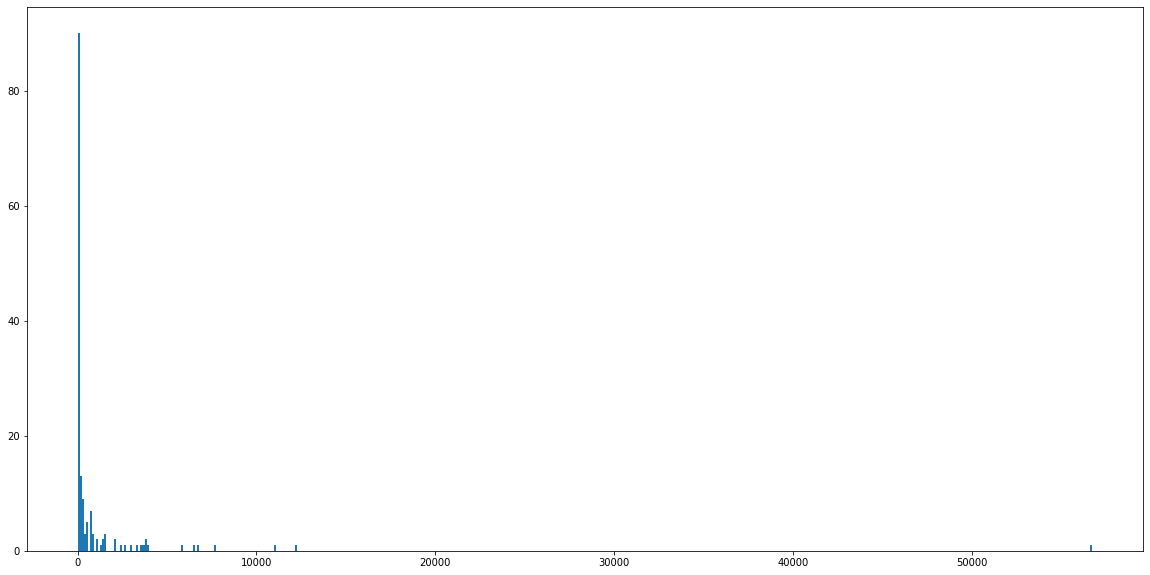

In [217]:
f, ax = plt.subplots(figsize=(20, 10))
ax.hist(overall_train['country_by_ip'].value_counts(), bins=500)

In [199]:
overall_train.dtypes()

,query_word_count,query_char_count,local_hour_of_request,hour_request_received,recommendation_algorithm_id_used,clicks,ctr,set_clicked
query_word_count,1.000000,0.949020,-0.009636,-0.027588,0.019961,0.007469,0.005556,0.002521
query_char_count,0.949020,1.000000,-0.013126,-0.022418,0.022125,0.004390,0.002505,0.000250
local_hour_of_request,-0.009636,-0.013126,1.000000,0.435701,-0.008221,-0.006134,-0.005919,-0.006913
hour_request_received,-0.027588,-0.022418,0.435701,1.000000,-0.000753,-0.002955,-0.003232,-0.005045
recommendation_algorithm_id_used,0.019961,0.022125,-0.008221,-0.000753,1.000000,-0.000078,0.001093,-0.001858
clicks,0.007469,0.004390,-0.006134,-0.002955,-0.000078,1.000000,0.961419,0.807905
ctr,0.005556,0.002505,-0.005919,-0.003232,0.001093,0.961419,1.000000,0.783315
set_clicked,0.002521,0.000250,-0.006913,-0.005045,-0.001858,0.807905,0.783315,1.000000


In [91]:
def anova(df, cat_cols, dep_col):
    
    results = {'column': [], 'stat': [], 'result': []}
    for col in cat_cols:
        groups = pd.unique(df[col].values)
        grp_data = (df[df[col]==group][dep_col] for group in groups)
        F, p = ss.f_oneway(*grp_data)
        results['column'].append(col)
        results['result'].append(p<=0.05)
        results['stat'].append(p)
    
    return pd.DataFrame(results, index=cat_cols)

In [252]:
anova(overall_train, overall_cat_cols, 'clicks')

,column,stat,result
item_type,item_type,NaN,False
application_type,application_type,NaN,False
app_lang,app_lang,9.771474e-14,True
app_version,app_version,7.752541e-05,True
country_by_ip,country_by_ip,1.007799e-149,True
timezone_by_ip,timezone_by_ip,2.259577e-39,True
local_hour_of_request,local_hour_of_request,7.823837e-02,False
hour_request_received,hour_request_received,8.608529e-02,False
algorithm_class,algorithm_class,NaN,False
recommendation_algorithm_id_used,recommendation_algorithm_id_used,4.098494e-02,True


In [226]:
anova(dig_train_all, jabref_cat_cols+cbf_cols, 'clicks')

,column,stat,result
query_detected_language,query_detected_language,7.113228e-15,True
q_doc_id_provided,q_doc_id_provided,7.322474e-08,True
hour_request_received,hour_request_received,7.170769e-02,False
country_by_ip,country_by_ip,NaN,False
timezone_by_ip,timezone_by_ip,1.578841e-47,True
local_hour_of_request,local_hour_of_request,7.991552e-03,True
number_of_recs_in_set,number_of_recs_in_set,4.911860e-03,True
algorithm_class,algorithm_class,NaN,False
recommendation_algorithm_id_used,recommendation_algorithm_id_used,3.193256e-02,True
app_lang,app_lang,NaN,False


In [233]:
dig_train_all['app_version'].value_counts()

4.3.1                                                        153883
4.1                                                            6829
4                                                              4395
4.2                                                            3516
4.3                                                             586
4.0.0-beta                                                      228
4.0-beta3                                                       204
5.0-dev                                                         126
*unknown*                                                        93
4.0-beta2                                                        59
5.0-dev--snapshot--2018-07-19--master--9ae2b404e                 35
4.0-dev                                                          29
5.0-alpha                                                        20
5.0-dev--snapshot--2018-09-29--master--933b2346f                 18
4.0-dev--snapshot--2017-09-13--master--343545ee8

In [229]:
anova(dig_train_all, jabref_cat_cols+cbf_cols, 'set_clicked')

,column,stat,result
query_detected_language,query_detected_language,1.574915e-07,True
q_doc_id_provided,q_doc_id_provided,2.309498e-13,True
hour_request_received,hour_request_received,1.336362e-01,False
country_by_ip,country_by_ip,NaN,False
timezone_by_ip,timezone_by_ip,1.964725e-29,True
local_hour_of_request,local_hour_of_request,2.887781e-02,True
number_of_recs_in_set,number_of_recs_in_set,8.497922e-04,True
algorithm_class,algorithm_class,NaN,False
recommendation_algorithm_id_used,recommendation_algorithm_id_used,6.886962e-08,True
app_lang,app_lang,NaN,False


In [237]:
anova(dig_train, jabref_cat_cols, 'clicks')

,column,stat,result
query_detected_language,query_detected_language,4.531433e-02,True
q_doc_id_provided,q_doc_id_provided,2.166255e-01,False
hour_request_received,hour_request_received,1.638936e-01,False
country_by_ip,country_by_ip,7.834992e-20,True
timezone_by_ip,timezone_by_ip,6.103665e-11,True
local_hour_of_request,local_hour_of_request,7.306412e-03,True
number_of_recs_in_set,number_of_recs_in_set,5.326607e-01,False
algorithm_class,algorithm_class,2.909728e-11,True
recommendation_algorithm_id_used,recommendation_algorithm_id_used,1.638322e-08,True
app_lang,app_lang,NaN,False


In [92]:
anova(dig_train, jabref_cat_cols, 'set_clicked')

C:\ProgramData\Anaconda3\envs\kaggle\lib\site-packages\scipy\stats\stats.py:3225: RuntimeWarning: invalid value encountered in double_scalars
  ssbn += _square_of_sums(a - offset) / len(a)


,column,stat,result
query_detected_language,query_detected_language,2.584220e-01,False
q_doc_id_provided,q_doc_id_provided,2.291701e-01,False
hour_request_received,hour_request_received,2.182045e-01,False
country_by_ip,country_by_ip,1.774002e-19,True
timezone_by_ip,timezone_by_ip,1.498142e-12,True
local_hour_of_request,local_hour_of_request,2.989910e-04,True
number_of_recs_in_set,number_of_recs_in_set,6.820682e-01,False
algorithm_class,algorithm_class,1.826063e-15,True
recommendation_algorithm_id_used,recommendation_algorithm_id_used,7.163293e-13,True
app_lang,app_lang,NaN,False


In [93]:
anova(dig_cbf_train, jabref_cat_cols+cbf_cols, 'set_clicked')

C:\ProgramData\Anaconda3\envs\kaggle\lib\site-packages\scipy\stats\stats.py:3233: RuntimeWarning: invalid value encountered in double_scalars
  msb = ssbn / dfbn


,column,stat,result
query_detected_language,query_detected_language,1.574915e-07,True
q_doc_id_provided,q_doc_id_provided,2.309498e-13,True
hour_request_received,hour_request_received,1.336362e-01,False
country_by_ip,country_by_ip,NaN,False
timezone_by_ip,timezone_by_ip,1.964725e-29,True
local_hour_of_request,local_hour_of_request,2.887781e-02,True
number_of_recs_in_set,number_of_recs_in_set,8.497922e-04,True
algorithm_class,algorithm_class,NaN,False
recommendation_algorithm_id_used,recommendation_algorithm_id_used,6.886962e-08,True
app_lang,app_lang,NaN,False


In [241]:
anova(cblog_cbf_train, cblog_cat_cols+cbf_cols, 'set_clicked')

,column,stat,result
query_detected_language,query_detected_language,9.670715e-01,False
organization_id,organization_id,3.193447e-02,True
application_type,application_type,3.193447e-02,True
hour_request_received,hour_request_received,2.375400e-01,False
item_type,item_type,3.561119e-22,True
country_by_ip,country_by_ip,NaN,False
number_of_recs_in_set,number_of_recs_in_set,3.032458e-01,False
algorithm_class,algorithm_class,NaN,False
recommendation_algorithm_id_used,recommendation_algorithm_id_used,5.579178e-08,True
cbf_parser,cbf_parser,9.000120e-06,True


In [247]:
anova(cblog_train, cblog_cat_cols, 'set_clicked')

,column,stat,result
query_detected_language,query_detected_language,0.958828,False
organization_id,organization_id,0.416240,False
application_type,application_type,0.416240,False
hour_request_received,hour_request_received,0.045052,True
item_type,item_type,0.000186,True
country_by_ip,country_by_ip,NaN,False
number_of_recs_in_set,number_of_recs_in_set,0.900676,False
algorithm_class,algorithm_class,0.076596,False
recommendation_algorithm_id_used,recommendation_algorithm_id_used,0.530718,False


In [245]:
anova(cblog_train_all, cblog_cat_cols+cbf_cols, 'set_clicked')

,column,stat,result
query_detected_language,query_detected_language,9.670715e-01,False
organization_id,organization_id,3.193447e-02,True
application_type,application_type,3.193447e-02,True
hour_request_received,hour_request_received,2.375400e-01,False
item_type,item_type,3.561119e-22,True
country_by_ip,country_by_ip,NaN,False
number_of_recs_in_set,number_of_recs_in_set,3.032458e-01,False
algorithm_class,algorithm_class,NaN,False
recommendation_algorithm_id_used,recommendation_algorithm_id_used,5.579178e-08,True
cbf_parser,cbf_parser,9.000120e-06,True


In [13]:
raw_train_df[raw_train_df['algorithm_class']!='content_based_filtering']['search_keywords'].value_counts()

no    110616
Name: search_keywords, dtype: int64

In [15]:
raw_train_df[['rec_processing_time', 'application_type', 'set_clicked']].groupby(['application_type']).mean()

,rec_processing_time,set_clicked
application_type,,
0,3.008767,0.050000
blog,1.103026,0.010452
digital_library,5.348441,0.020500
e-commerce,1.340237,0.010523


In [39]:
raw_train_df[raw_train_df['rec_processing_time']>37]['set_clicked'].value_counts()

0    292
1      1
Name: set_clicked, dtype: int64

(array([4022., 1636.,  630.,  259.,  113.,   51.,   21.,   14.,   10.,
           7.]),
 array([2.02084000e-02, 3.79926756e+00, 7.57832672e+00, 1.13573859e+01,
        1.51364450e+01, 1.89155042e+01, 2.26945634e+01, 2.64736225e+01,
        3.02526817e+01, 3.40317408e+01, 3.78108000e+01]),
 <a list of 10 Patch objects>)

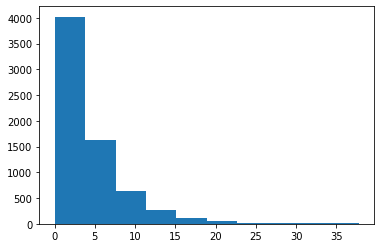

In [31]:
plt.hist(raw_train_df[raw_train_df['set_clicked']==1]['rec_processing_time'])


(0, 40)

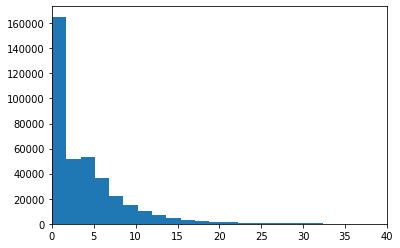

In [30]:
plt.hist(raw_train_df[raw_train_df['set_clicked']==0]['rec_processing_time'], bins=10000)
plt.xlim(0, 40)

In [48]:
raw_train_df[(raw_train_df['application_type']=='0') & (raw_train_df['set_clicked']==1)]['item_type'].value_counts()

\N                    9
Home entertainment    4
Name: item_type, dtype: int64

In [3]:
raw_test_df = pd.read_csv(data_dir+"/tcdml1920-rec-click-pred--test.csv")

In [4]:
raw_test_df = raw_test_df.replace('\\N', np.nan)

In [5]:
for col in raw_test_df.columns:
    print("Col: ", col, " Missing: ", raw_test_df[col].value_counts(dropna=False, normalize=True).loc[np.nan])

Col:  recommendation_set_id  Missing:  0.1526130467012602
Col:  user_id  Missing:  0.7939214232765011
Col:  session_id  Missing:  0.7939214232765011
Col:  query_identifier  Missing:  0.15279836916234246
Col:  query_word_count  Missing:  0.15279836916234246
Col:  query_char_count  Missing:  0.15279836916234246
Col:  query_detected_language  Missing:  0.15752409191994068
Col:  query_document_id  Missing:  0.5308561897702001
Col:  document_language_provided  Missing:  0.9919384729429207
Col:  year_published  Missing:  0.8666604892512972
Col:  number_of_authors  Missing:  0.8693476649369903
Col:  abstract_word_count  Missing:  0.566067457375834
Col:  abstract_char_count  Missing:  0.566067457375834
Col:  abstract_detected_language  Missing:  0.5663454410674573
Col:  first_author_id  Missing:  0.8731467753891772
Col:  num_pubs_by_first_author  Missing:  0.8731467753891772
Col:  organization_id  Missing:  0.1526130467012602
Col:  application_type  Missing:  0.1526130467012602
Col:  item_type

In [39]:
for col in raw_test_df.columns:
    print("Col: ", col, " Missing: ", raw_test_df.loc[raw_test_df[raw_test_df['application_type'].isin([np.nan])==True].index, :][col].value_counts(dropna=False, normalize=True).loc[np.nan])

Col:  recommendation_set_id  Missing:  1.0
Col:  user_id  Missing:  1.0
Col:  session_id  Missing:  1.0
Col:  query_identifier  Missing:  1.0
Col:  query_word_count  Missing:  1.0
Col:  query_char_count  Missing:  1.0
Col:  query_detected_language  Missing:  1.0
Col:  query_document_id  Missing:  1.0
Col:  document_language_provided  Missing:  1.0
Col:  year_published  Missing:  1.0
Col:  number_of_authors  Missing:  1.0
Col:  abstract_word_count  Missing:  1.0
Col:  abstract_char_count  Missing:  1.0
Col:  abstract_detected_language  Missing:  1.0
Col:  first_author_id  Missing:  1.0
Col:  num_pubs_by_first_author  Missing:  1.0
Col:  organization_id  Missing:  1.0
Col:  application_type  Missing:  1.0
Col:  item_type  Missing:  1.0
Col:  request_received  Missing:  1.0
Col:  hour_request_received  Missing:  1.0
Col:  response_delivered  Missing:  1.0
Col:  rec_processing_time  Missing:  1.0
Col:  app_version  Missing:  1.0
Col:  app_lang  Missing:  1.0
Col:  user_os  Missing:  1.0
Co

In [94]:
for app in set(raw_test_df['application_type']):
    if app==np.nan:
        df = raw_test_df.loc[(raw_test_df.isin([np.nan])).all(axis=1)[(raw_test_df.isin([np.nan])).all(axis=1)==True].index, :]
    else:
        df = raw_test_df[raw_test_df['application_type']==app]
    print("\n App: ", app)
    for col in raw_test_df.columns:
        if np.nan in df[col].value_counts(dropna=False).index:
            print("Col: ", col, " Missing: ", df[col].value_counts(dropna=False, normalize=True).loc[np.nan])


 App:  nan

 App:  e-commerce
Col:  user_id  Missing:  0.2652791542781632
Col:  session_id  Missing:  0.2652791542781632
Col:  query_document_id  Missing:  0.14106375949785266
Col:  document_language_provided  Missing:  1.0
Col:  year_published  Missing:  1.0
Col:  number_of_authors  Missing:  1.0
Col:  abstract_word_count  Missing:  0.1443673604228609
Col:  abstract_char_count  Missing:  0.1443673604228609
Col:  abstract_detected_language  Missing:  0.1443673604228609
Col:  first_author_id  Missing:  1.0
Col:  num_pubs_by_first_author  Missing:  1.0
Col:  item_type  Missing:  0.2943508424182359
Col:  app_version  Missing:  1.0
Col:  app_lang  Missing:  0.0019821605550049554
Col:  user_os  Missing:  1.0
Col:  user_os_version  Missing:  1.0
Col:  user_java_version  Missing:  1.0
Col:  user_timezone  Missing:  1.0
Col:  country_by_ip  Missing:  0.002642880740006607
Col:  timezone_by_ip  Missing:  0.3270564915758176
Col:  local_time_of_request  Missing:  0.3270564915758176
Col:  local_ho

<BarContainer object of 6 artists>

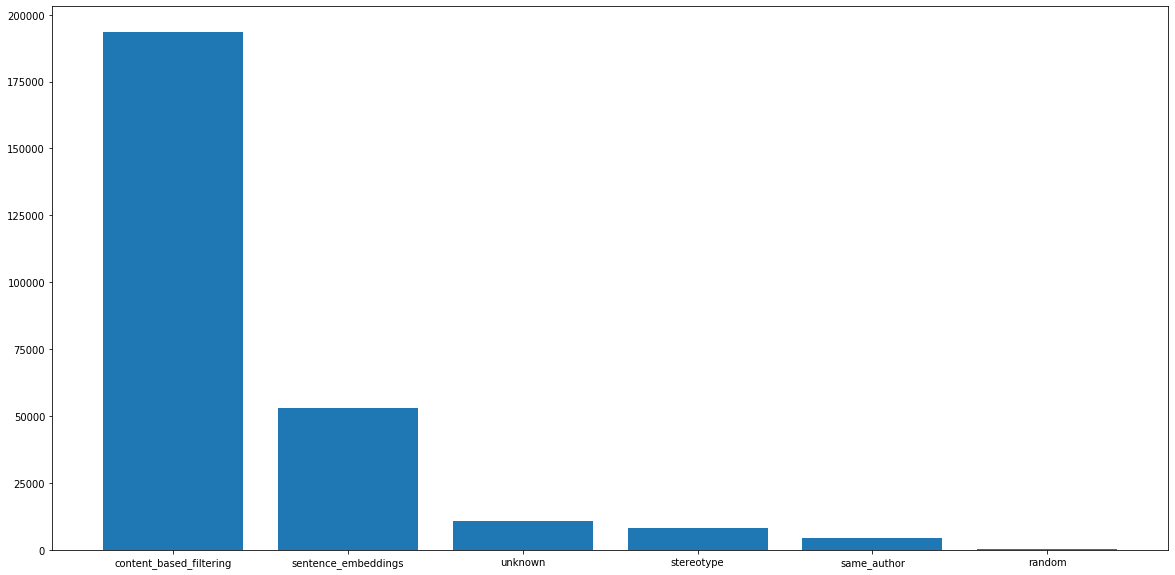

In [46]:
f, ax= plt.subplots(figsize=(20,10))
ax.bar(raw_train_df[raw_train_df['application_type']=='digital_library']['algorithm_class'].value_counts().index, raw_train_df[raw_train_df['application_type']=='digital_library']['algorithm_class'].value_counts())

In [118]:
raw_train_df['item_type'].value_counts()

academic_publication     270145
\N                        36223
Music making & pedals     28617
article                   14959
Home entertainment        10787
Hard drives & NAS          7725
Everything else            6663
DAB & audio                4877
Networking                 2082
DVD players                1412
Gaming & toys               938
Photo & frames              916
TVs & monitors              343
Name: item_type, dtype: int64

(1, 7)

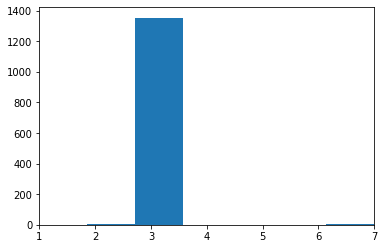

In [133]:
plt.hist(cblog_cbf_train[cblog_cbf_train['item_type']=='Networking']['number_of_recs_in_set'], bins=7)
plt.xlim(1, 7)

(array([6., 2., 4., 9., 5., 2., 2., 0., 0., 2.]),
 array([0.        , 0.00666667, 0.01333333, 0.02      , 0.02666667,
        0.03333333, 0.04      , 0.04666667, 0.05333333, 0.06      ,
        0.06666667]),
 <a list of 10 Patch objects>)

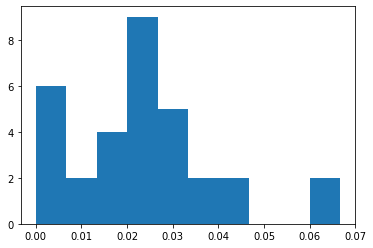

In [178]:
plt.hist(dig_cbf_train[['timezone_by_ip', 'set_clicked']].groupby(['timezone_by_ip']).mean()['set_clicked'].values)

In [201]:
viewed = raw_train_df[(raw_train_df['time_recs_viewed']!="\\N") | (raw_train_df['set_clicked']==1)]

In [183]:
for col in viewed.columns:
    if '\\N' in viewed[col].value_counts().index:
        print(col ,': ' , viewed[col].value_counts().loc['\\N'], ' ,', int(viewed[col].value_counts().loc['\\N']*100/viewed.shape[0]))
        

user_id :  10802  , 55
session_id :  10802  , 55
query_identifier :  7  , 0
query_word_count :  7  , 0
query_char_count :  7  , 0
query_detected_language :  37  , 0
query_document_id :  4125  , 21
document_language_provided :  19188  , 99
year_published :  17587  , 91
number_of_authors :  17597  , 91
abstract_word_count :  4598  , 23
abstract_char_count :  4598  , 23
abstract_detected_language :  4598  , 23
first_author_id :  17692  , 91
num_pubs_by_first_author :  17692  , 91
item_type :  2118  , 10
app_version :  13690  , 70
app_lang :  4484  , 23
user_os :  19219  , 99
user_os_version :  19296  , 99
user_java_version :  19296  , 99
user_timezone :  19219  , 99
country_by_ip :  142  , 0
timezone_by_ip :  1525  , 7
local_time_of_request :  1792  , 9
local_hour_of_request :  1792  , 9
recommendation_algorithm_id_used :  278  , 1
cbf_parser :  6240  , 32
time_recs_recieved :  6167  , 31
time_recs_displayed :  6169  , 31
time_recs_viewed :  6150  , 31


In [179]:
e[~(raw_test_df['application_type'].isna())]

,recommendation_set_id,user_id,session_id,query_identifier,query_word_count,query_char_count,query_detected_language,query_document_id,document_language_provided,year_published,...,cbf_parser,search_title,search_keywords,search_abstract,time_recs_recieved,time_recs_displayed,time_recs_viewed,clicks,ctr,set_clicked
0,46914.0,NaN,NaN,Withheld for privacy,18,126,en,NaN,NaN,NaN,...,standard_QP,yes,no,no,nA,nA,nA,nA,nA,NaN
1,46961.0,NaN,NaN,Withheld for privacy,5,60,en,NaN,NaN,NaN,...,standard_QP,yes,no,no,nA,nA,nA,nA,nA,NaN
2,47012.0,NaN,NaN,Withheld for privacy,8,54,en,NaN,NaN,NaN,...,edismax_QP,yes,yes,no,nA,nA,nA,nA,nA,NaN
3,47181.0,NaN,NaN,Withheld for privacy,9,59,en,11559885,NaN,2017,...,standard_QP,yes,no,no,nA,nA,nA,nA,nA,NaN
4,47240.0,NaN,NaN,Withheld for privacy,10,81,en,NaN,NaN,NaN,...,standard_QP,yes,no,no,nA,nA,nA,nA,nA,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9140,459386.0,NaN,NaN,Withheld for privacy,6,49,en,NaN,NaN,NaN,...,edismax_QP,yes,no,no,nA,nA,nA,nA,nA,NaN
9141,459429.0,NaN,NaN,"Update for Docear's ""Google Scholar Parser"" Li...",19,116,en,124015836,NaN,NaN,...,standard_QP,yes,no,yes,nA,nA,nA,nA,nA,NaN
9142,459432.0,NaN,NaN,Withheld for privacy,0,8,NaN,NaN,NaN,NaN,...,NaN,no,no,no,nA,nA,nA,nA,nA,NaN
9143,459438.0,039da69e52a0c5e1dfb0faf718068752,289d30a4d23579d26a05a8aa808752b5,Saitek Pro Flight Yoke PZ44 Compatible Power S...,10,64,en,123983813,NaN,NaN,...,NaN,no,no,no,nA,nA,nA,nA,nA,NaN


In [185]:
viewed.columns

Index(['recommendation_set_id', 'user_id', 'session_id', 'query_identifier',
       'query_word_count', 'query_char_count', 'query_detected_language',
       'query_document_id', 'document_language_provided', 'year_published',
       'number_of_authors', 'abstract_word_count', 'abstract_char_count',
       'abstract_detected_language', 'first_author_id',
       'num_pubs_by_first_author', 'organization_id', 'application_type',
       'item_type', 'request_received', 'hour_request_received',
       'response_delivered', 'rec_processing_time', 'app_version', 'app_lang',
       'user_os', 'user_os_version', 'user_java_version', 'user_timezone',
       'country_by_ip', 'timezone_by_ip', 'local_time_of_request',
       'local_hour_of_request', 'number_of_recs_in_set',
       'recommendation_algorithm_id_used', 'algorithm_class', 'cbf_parser',
       'search_title', 'search_keywords', 'search_abstract',
       'time_recs_recieved', 'time_recs_displayed', 'time_recs_viewed',
       'clicks', 

In [202]:
cols = ['query_word_count', 'query_char_count', 'query_detected_language', 'query_document_id', 'item_type', 'application_type', 
            'abstract_word_count', 'abstract_char_count', 'abstract_detected_language', 
            'app_lang', 'country_by_ip', 'timezone_by_ip', 'local_hour_of_request', 'hour_request_received',
            'algorithm_class','recommendation_algorithm_id_used', 'cbf_parser', 'search_title', 'search_keywords',
            'search_abstract', 'q_doc_id_provided', 'set_clicked']    
viewed = viewed[cols]
    
viewed_notnull = viewed.loc[(~viewed.isin(["\\N"])).all(axis=1)[(~viewed.isin(["\\N"])).all(axis=1)==True].index, :]

In [213]:
viewed_cat_cols = list(set(overall_cat_cols).intersection(set(viewed_notnull.columns))) + ['abstract_detected_language', 'query_detected_language']
chi_square_test(['set_clicked'] + viewed_cat_cols, viewed_notnull)

,stat,critical,rejected_cric,p-value,alpha,rejected_p
"(set_clicked, cbf_parser)",27.769563,5.991465,True,9.330736e-07,0.05,True
"(set_clicked, application_type)",3197.592180,3.841459,True,0.000000e+00,0.05,True
"(set_clicked, search_abstract)",37.089315,3.841459,True,1.128403e-09,0.05,True
"(set_clicked, timezone_by_ip)",1360.718188,38.885139,True,6.982931e-271,0.05,True
"(set_clicked, item_type)",3210.195347,18.307038,True,0.000000e+00,0.05,True
"(set_clicked, app_lang)",314.836272,15.507313,True,2.854222e-63,0.05,True
"(set_clicked, algorithm_class)",0.000000,NaN,False,1.000000e+00,0.05,False
"(set_clicked, search_title)",0.000000,NaN,False,1.000000e+00,0.05,False
"(set_clicked, country_by_ip)",1771.756932,122.107735,True,4.699853e-305,0.05,True
"(set_clicked, local_hour_of_request)",60.864432,35.172462,True,2.862504e-05,0.05,True


In [216]:
pd.set_option('display.max_rows', 200)
cram_df = cramers_corrected_stat(viewed_notnull, ['set_clicked'] + viewed_cat_cols)
cram_df['stat_new'] = cram_df.apply(lambda x: x['stat']*x['sqrt_df'], axis=1)
cram_df

C:\ProgramData\Anaconda3\envs\kaggle\lib\site-packages\ipykernel_launcher.py:17: RuntimeWarning: invalid value encountered in double_scalars


,stat,sqrt_df,stat_new
"(set_clicked, cbf_parser)",0.072166,0.999899,0.072159
"(set_clicked, application_type)",0.803764,0.999899,0.803683
"(set_clicked, search_abstract)",0.085403,0.999899,0.085394
"(set_clicked, timezone_by_ip)",0.519373,0.999899,0.519320
"(set_clicked, item_type)",0.804217,0.999899,0.804136
"(set_clicked, app_lang)",0.249022,0.999899,0.248997
"(set_clicked, algorithm_class)",NaN,0.000000,NaN
"(set_clicked, search_title)",NaN,0.000000,NaN
"(set_clicked, country_by_ip)",0.581606,0.999899,0.581547
"(set_clicked, local_hour_of_request)",0.087473,0.999899,0.087464


In [220]:
viewed_num = list(set(viewed_notnull.columns)  - set(viewed_cat_cols))

In [219]:
viewed_num

{'abstract_char_count',
 'abstract_word_count',
 'q_doc_id_provided',
 'query_char_count',
 'query_document_id',
 'query_word_count',
 'set_clicked'}

In [221]:
viewed_notnull[viewed_num] = viewed_notnull[viewed_num].astype('float64')
viewed_notnull.corr()

,query_word_count,query_char_count,query_document_id,abstract_word_count,abstract_char_count,hour_request_received,q_doc_id_provided,set_clicked
query_word_count,1.000000,0.902892,0.227105,0.155239,0.124276,-0.012702,NaN,-0.112413
query_char_count,0.902892,1.000000,0.160513,0.168341,0.173396,-0.009152,NaN,-0.060428
query_document_id,0.227105,0.160513,1.000000,-0.189883,-0.210958,0.000605,NaN,-0.746185
abstract_word_count,0.155239,0.168341,-0.189883,1.000000,0.979850,0.004208,NaN,0.193463
abstract_char_count,0.124276,0.173396,-0.210958,0.979850,1.000000,0.007545,NaN,0.208414
hour_request_received,-0.012702,-0.009152,0.000605,0.004208,0.007545,1.000000,NaN,-0.007501
q_doc_id_provided,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
set_clicked,-0.112413,-0.060428,-0.746185,0.193463,0.208414,-0.007501,NaN,1.000000


In [222]:
anova(viewed_notnull, viewed_cat_cols, 'set_clicked')

C:\ProgramData\Anaconda3\envs\kaggle\lib\site-packages\scipy\stats\stats.py:3233: RuntimeWarning: invalid value encountered in double_scalars
  msb = ssbn / dfbn


,column,stat,result
cbf_parser,cbf_parser,9.048991e-07,True
application_type,application_type,0.000000e+00,True
search_abstract,search_abstract,8.668721e-10,True
timezone_by_ip,timezone_by_ip,4.695649e-319,True
item_type,item_type,0.000000e+00,True
app_lang,app_lang,2.044852e-65,True
algorithm_class,algorithm_class,NaN,False
search_title,search_title,NaN,False
country_by_ip,country_by_ip,0.000000e+00,True
local_hour_of_request,local_hour_of_request,2.667745e-05,True
